# Analysis of Model Training Results

This notebook analyzes the results from training hybrid CNN+MLP models for phoneme classification:
- **b-p pair**: voiced vs unvoiced bilabial plosives
- **d-t pair**: voiced vs unvoiced alveolar plosives
- **g-k pair**: voiced vs unvoiced velar plosives

For each pair, we will:
1. Load predictions and metrics
2. Create confusion matrices
3. Analyze common features of misclassified phonemes
4. Visualize probability distributions for correct vs incorrect predictions


In [18]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Project root
PROJECT_ROOT = Path('/Volumes/SSanDisk/SpeechRec-German')

# Define paths for each phoneme pair
PAIRS_CONFIG = {
    'b-p': {
        'name': 'b-p (Bilabial Plosives)',
        'class_0': 'b',
        'class_1': 'p',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'b-p_dl_models_with_context' / 'improved_models' / 'hybrid_cnn_mlp_v3_with_context' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'b-p_dl_models_with_context' / 'improved_models' / 'hybrid_cnn_mlp_v3_with_context' / 'test_metrics.json',
        'features_path': PROJECT_ROOT / 'artifacts' / 'b-p_dl_models_with_context' / 'features' / 'features.parquet'
    },
    'd-t': {
        'name': 'd-t (Alveolar Plosives)',
        'class_0': 'd',
        'class_1': 't',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'd-t_dl_models_with_context' / 'improved_models' / 'hybrid_cnn_mlp_v3_with_context' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'd-t_dl_models_with_context' / 'improved_models' / 'hybrid_cnn_mlp_v3_with_context' / 'test_metrics.json',
        'features_path': PROJECT_ROOT / 'artifacts' / 'd-t_dl_models_with_context' / 'features' / 'features.parquet'
    },
    'g-k': {
        'name': 'g-k (Velar Plosives)',
        'class_0': 'k',
        'class_1': 'ɡ',
        'predictions_path': PROJECT_ROOT / 'artifacts' / 'g-k_dl_models_with_context' / 'improved_models' / 'hybrid_cnn_mlp_v3_with_context' / 'test_predictions_with_probs.csv',
        'metrics_path': PROJECT_ROOT / 'artifacts' / 'g-k_dl_models_with_context' / 'improved_models' / 'hybrid_cnn_mlp_v3_with_context' / 'test_metrics.json',
        'features_path': PROJECT_ROOT / 'artifacts' / 'g-k_dl_models_with_context' / 'features' / 'features.parquet'
    }
}

print("Configuration loaded successfully!")
print(f"\nAnalyzing {len(PAIRS_CONFIG)} phoneme pairs:")
for pair_name, config in PAIRS_CONFIG.items():
    print(f"  - {config['name']}")


Configuration loaded successfully!

Analyzing 3 phoneme pairs:
  - b-p (Bilabial Plosives)
  - d-t (Alveolar Plosives)
  - g-k (Velar Plosives)


## Part 1: Analysis of b-p Pair (Bilabial Plosives)


In [19]:
# Load data for b-p pair
pair_key = 'b-p'
config = PAIRS_CONFIG[pair_key]

print(f"\n{'='*70}")
print(f"Analyzing: {config['name']}")
print(f"{'='*70}")

# Load predictions
predictions_df = pd.read_csv(config['predictions_path'])
print(f"\nLoaded {len(predictions_df)} predictions")
print(f"Correct: {predictions_df['is_correct'].sum()}, Incorrect: {(~predictions_df['is_correct'].astype(bool)).sum()}")

# Load metrics
with open(config['metrics_path'], 'r') as f:
    metrics = json.load(f)

print(f"\nModel Performance:")
print(f"  Accuracy: {metrics['accuracy']:.4f}")
print(f"  F1-score: {metrics['f1']:.4f}")
print(f"  Precision: {metrics['precision']:.4f}")
print(f"  Recall: {metrics['recall']:.4f}")
print(f"  ROC-AUC: {metrics['roc_auc']:.4f}")



Analyzing: b-p (Bilabial Plosives)

Loaded 5536 predictions
Correct: 5344, Incorrect: 192

Model Performance:
  Accuracy: 0.9653
  F1-score: 0.9654
  Precision: 0.9655
  Recall: 0.9653
  ROC-AUC: 0.9903


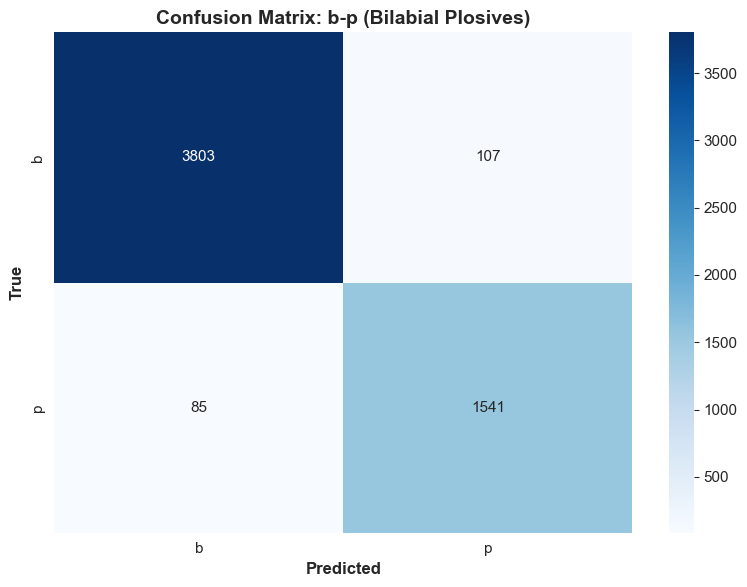


Classification Report:
              precision    recall  f1-score   support

           b     0.9781    0.9726    0.9754      3910
           p     0.9351    0.9477    0.9414      1626

    accuracy                         0.9653      5536
   macro avg     0.9566    0.9602    0.9584      5536
weighted avg     0.9655    0.9653    0.9654      5536



In [20]:
# 1. Confusion Matrix
y_true = predictions_df['true_class_encoded'].values
y_pred = predictions_df['predicted_class_encoded'].values

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=[config['class_0'], config['class_1']],
            yticklabels=[config['class_0'], config['class_1']])
ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax.set_ylabel('True', fontsize=12, fontweight='bold')
ax.set_title(f'Confusion Matrix: {config["name"]}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, 
                          target_names=[config['class_0'], config['class_1']],
                          digits=4))



Loaded features: (36903, 112)
Correct predictions: 5344
Incorrect predictions: 192

Analyzing 109 numeric features...

Top 20 features with largest differences between correct and incorrect predictions:
            feature  correct_mean  incorrect_mean  absolute_diff  relative_diff_pct
 delta_mfcc_mean_12     -0.012258       -0.400610       0.388352        3168.131592
delta2_mfcc_mean_12      0.069999       -0.480551       0.550550         786.513855
 delta2_mfcc_mean_6     -0.109127       -0.645611       0.536484         491.613708
 delta2_mfcc_mean_7      0.068727       -0.242199       0.310927         452.405212
  delta_mfcc_mean_4      0.227357       -0.339225       0.566582         249.204010
 delta2_mfcc_mean_3     -0.342251       -1.035107       0.692856         202.440979
  delta_mfcc_mean_2     -0.562934       -1.694472       1.131538         201.007202
 delta2_mfcc_mean_8      0.321727       -0.292219       0.613946         190.828003
delta2_mfcc_mean_10     -0.234716       

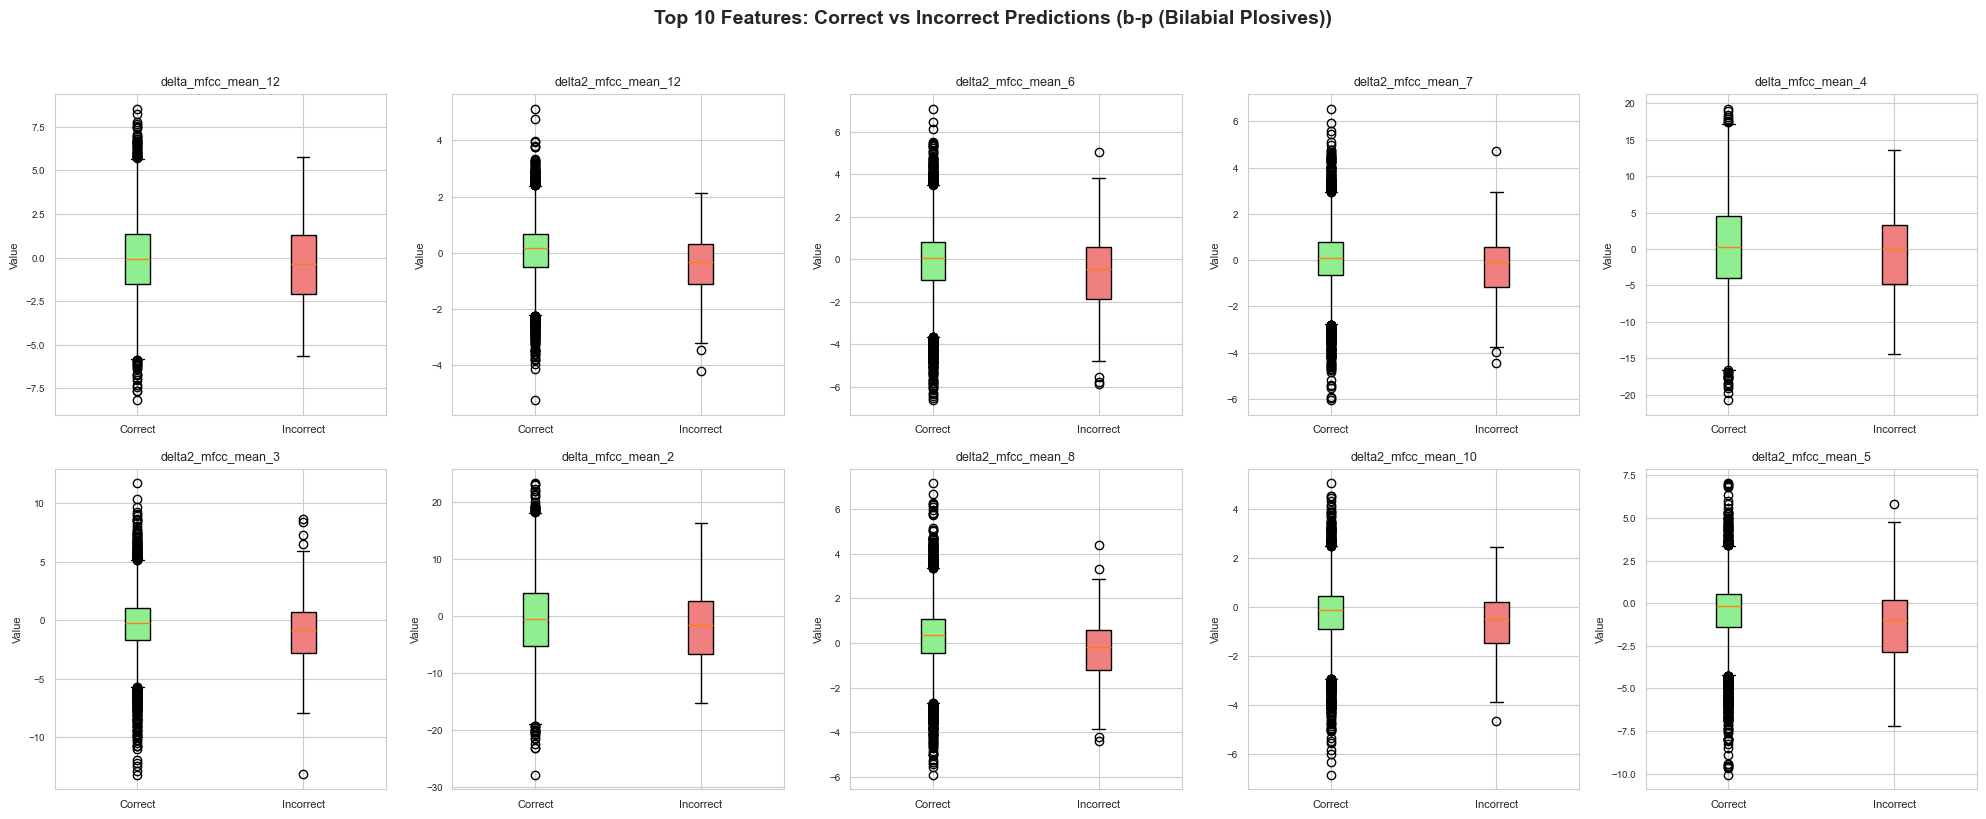

In [21]:
# 2. Load features for misclassified phonemes analysis
try:
    features_df = pd.read_parquet(config['features_path'])
    print(f"\nLoaded features: {features_df.shape}")
    
    # Merge predictions with features
    merged_df = predictions_df.merge(
        features_df[['phoneme_id'] + [col for col in features_df.columns if col not in ['phoneme_id', 'class', 'phoneme', 'utterance_id', 'duration_ms']]],
        on='phoneme_id',
        how='left'
    )
    
    # Separate correct and incorrect predictions
    correct_df = merged_df[merged_df['is_correct'] == 1].copy()
    incorrect_df = merged_df[merged_df['is_correct'] == 0].copy()
    
    print(f"Correct predictions: {len(correct_df)}")
    print(f"Incorrect predictions: {len(incorrect_df)}")
    
    # Get numeric feature columns (exclude metadata)
    feature_cols = [col for col in merged_df.columns 
                   if col not in ['phoneme_id', 'utterance_id', 'phoneme', 'true_class', 
                                 'predicted_class', 'true_class_encoded', 'predicted_class_encoded',
                                 'is_correct', 'confidence', 'max_prob', 'prob_class_0', 'prob_class_1',
                                 'duration_ms', 'class']
                   and pd.api.types.is_numeric_dtype(merged_df[col])]
    
    print(f"\nAnalyzing {len(feature_cols)} numeric features...")
    
    # Calculate mean differences between correct and incorrect predictions
    feature_analysis = []
    for col in feature_cols:
        correct_mean = correct_df[col].mean()
        incorrect_mean = incorrect_df[col].mean()
        diff = abs(correct_mean - incorrect_mean)
        
        # Calculate relative difference
        if correct_mean != 0:
            rel_diff = (diff / abs(correct_mean)) * 100
        else:
            rel_diff = 0
        
        feature_analysis.append({
            'feature': col,
            'correct_mean': correct_mean,
            'incorrect_mean': incorrect_mean,
            'absolute_diff': diff,
            'relative_diff_pct': rel_diff
        })
    
    feature_analysis_df = pd.DataFrame(feature_analysis)
    feature_analysis_df = feature_analysis_df.sort_values('relative_diff_pct', ascending=False)
    
    # Show top 20 features with largest differences
    print("\nTop 20 features with largest differences between correct and incorrect predictions:")
    print(feature_analysis_df.head(20).to_string(index=False))
    
    # Visualize top features
    top_features = feature_analysis_df.head(10)['feature'].values
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    
    for idx, feat in enumerate(top_features):
        ax = axes[idx]
        
        # Box plot comparison
        data_to_plot = [
            correct_df[feat].dropna().values,
            incorrect_df[feat].dropna().values
        ]
        
        bp = ax.boxplot(data_to_plot, labels=['Correct', 'Incorrect'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightgreen')
        bp['boxes'][1].set_facecolor('lightcoral')
        
        ax.set_title(feat[:30] + '...' if len(feat) > 30 else feat, fontsize=9)
        ax.set_ylabel('Value', fontsize=8)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=7)
    
    plt.suptitle(f'Top 10 Features: Correct vs Incorrect Predictions ({config["name"]})', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"\nWarning: Could not load features for analysis: {e}")
    print("Skipping feature analysis...")


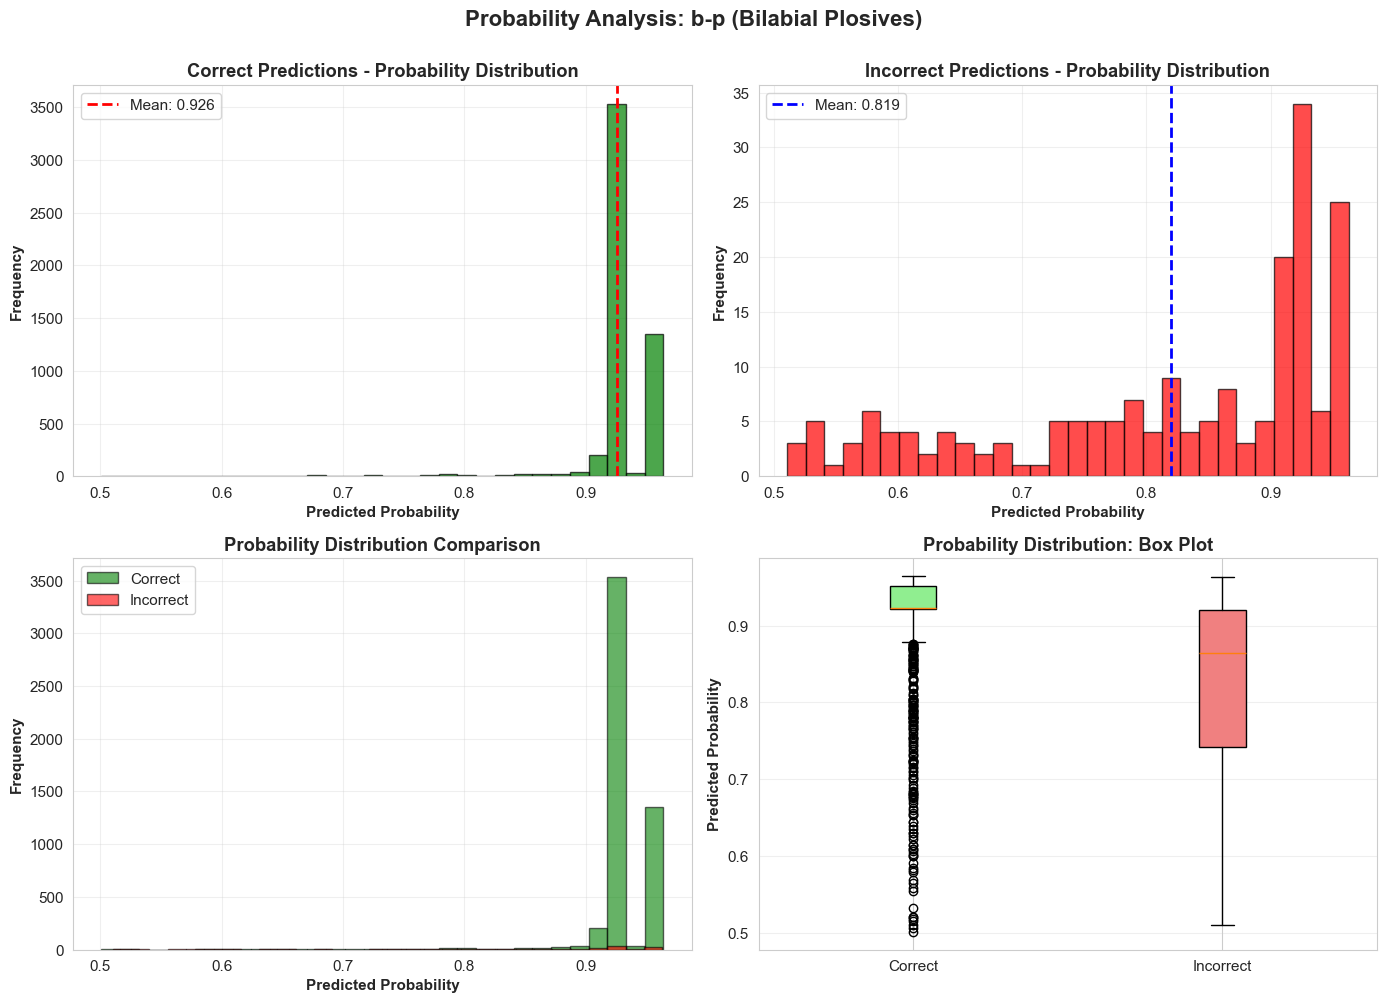


Probability Statistics:
Correct predictions:
  Mean: 0.9259
  Median: 0.9223
  Std: 0.0412
  Min: 0.5009, Max: 0.9642

Incorrect predictions:
  Mean: 0.8195
  Median: 0.8646
  Std: 0.1323
  Min: 0.5101, Max: 0.9632


In [22]:
# 3. Probability Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Correct predictions - probability distribution
correct_probs = predictions_df[predictions_df['is_correct'] == 1]['max_prob'].values
incorrect_probs = predictions_df[predictions_df['is_correct'] == 0]['max_prob'].values

# Plot 1: Histogram of probabilities for correct predictions
ax1 = axes[0, 0]
ax1.hist(correct_probs, bins=30, alpha=0.7, color='green', edgecolor='black')
ax1.axvline(correct_probs.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {correct_probs.mean():.3f}')
ax1.set_xlabel('Predicted Probability', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Correct Predictions - Probability Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram of probabilities for incorrect predictions
ax2 = axes[0, 1]
ax2.hist(incorrect_probs, bins=30, alpha=0.7, color='red', edgecolor='black')
ax2.axvline(incorrect_probs.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {incorrect_probs.mean():.3f}')
ax2.set_xlabel('Predicted Probability', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Incorrect Predictions - Probability Distribution', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Overlay comparison
ax3 = axes[1, 0]
ax3.hist(correct_probs, bins=30, alpha=0.6, color='green', label='Correct', edgecolor='black')
ax3.hist(incorrect_probs, bins=30, alpha=0.6, color='red', label='Incorrect', edgecolor='black')
ax3.set_xlabel('Predicted Probability', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Probability Distribution Comparison', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Box plot comparison
ax4 = axes[1, 1]
bp = ax4.boxplot([correct_probs, incorrect_probs], labels=['Correct', 'Incorrect'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('lightcoral')
ax4.set_ylabel('Predicted Probability', fontweight='bold')
ax4.set_title('Probability Distribution: Box Plot', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Probability Analysis: {config["name"]}', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

# Statistics
print("\nProbability Statistics:")
print(f"Correct predictions:")
print(f"  Mean: {correct_probs.mean():.4f}")
print(f"  Median: {np.median(correct_probs):.4f}")
print(f"  Std: {correct_probs.std():.4f}")
print(f"  Min: {correct_probs.min():.4f}, Max: {correct_probs.max():.4f}")
print(f"\nIncorrect predictions:")
print(f"  Mean: {incorrect_probs.mean():.4f}")
print(f"  Median: {np.median(incorrect_probs):.4f}")
print(f"  Std: {incorrect_probs.std():.4f}")
print(f"  Min: {incorrect_probs.min():.4f}, Max: {incorrect_probs.max():.4f}")


In [23]:
# 4. Detailed analysis of misclassified phonemes by class
print(f"\n{'='*70}")
print(f"Misclassification Analysis: {config['name']}")
print(f"{'='*70}")

# Count misclassifications by true class
misclassified = predictions_df[predictions_df['is_correct'] == 0].copy()

print(f"\nTotal misclassifications: {len(misclassified)}")
print(f"\nMisclassifications by true class:")
for true_class in [config['class_0'], config['class_1']]:
    count = len(misclassified[misclassified['true_class'] == true_class])
    total = len(predictions_df[predictions_df['true_class'] == true_class])
    pct = (count / total) * 100 if total > 0 else 0
    print(f"  {true_class}: {count}/{total} ({pct:.2f}%)")

# Show confusion matrix breakdown
print(f"\nConfusion Matrix Breakdown:")
print(f"  True {config['class_0']} predicted as {config['class_0']}: {cm[0, 0]}")
print(f"  True {config['class_0']} predicted as {config['class_1']}: {cm[0, 1]}")
print(f"  True {config['class_1']} predicted as {config['class_0']}: {cm[1, 0]}")
print(f"  True {config['class_1']} predicted as {config['class_1']}: {cm[1, 1]}")

# Analyze misclassified by probability
if len(misclassified) > 0:
    print(f"\nMisclassified phonemes with highest confidence (most confident errors):")
    top_errors = misclassified.nlargest(10, 'max_prob')[['phoneme_id', 'true_class', 'predicted_class', 'max_prob']]
    print(top_errors.to_string(index=False))
    
    print(f"\nMisclassified phonemes with lowest confidence (uncertain errors):")
    low_errors = misclassified.nsmallest(10, 'max_prob')[['phoneme_id', 'true_class', 'predicted_class', 'max_prob']]
    print(low_errors.to_string(index=False))



Misclassification Analysis: b-p (Bilabial Plosives)

Total misclassifications: 192

Misclassifications by true class:
  b: 107/3910 (2.74%)
  p: 85/1626 (5.23%)

Confusion Matrix Breakdown:
  True b predicted as b: 3803
  True b predicted as p: 107
  True p predicted as b: 85
  True p predicted as p: 1541

Misclassified phonemes with highest confidence (most confident errors):
 phoneme_id true_class predicted_class  max_prob
       2905          b               p  0.963161
      23124          b               p  0.963124
       3969          b               p  0.963010
      23490          b               p  0.962953
      12753          b               p  0.962686
      28735          b               p  0.962513
      15701          b               p  0.962243
       6192          b               p  0.962073
      13291          b               p  0.962051
      16403          b               p  0.961984

Misclassified phonemes with lowest confidence (uncertain errors):
 phoneme_id t

## Part 2: Analysis of d-t Pair (Alveolar Plosives)


In [24]:
# Load data for d-t pair
pair_key = 'd-t'
config = PAIRS_CONFIG[pair_key]

print(f"\n{'='*70}")
print(f"Analyzing: {config['name']}")
print(f"{'='*70}")

# Load predictions
predictions_df = pd.read_csv(config['predictions_path'])
print(f"\nLoaded {len(predictions_df)} predictions")
print(f"Correct: {predictions_df['is_correct'].sum()}, Incorrect: {(~predictions_df['is_correct'].astype(bool)).sum()}")

# Load metrics
with open(config['metrics_path'], 'r') as f:
    metrics = json.load(f)

print(f"\nModel Performance:")
print(f"  Accuracy: {metrics['accuracy']:.4f}")
print(f"  F1-score: {metrics['f1']:.4f}")
print(f"  Precision: {metrics['precision']:.4f}")
print(f"  Recall: {metrics['recall']:.4f}")
print(f"  ROC-AUC: {metrics['roc_auc']:.4f}")



Analyzing: d-t (Alveolar Plosives)

Loaded 19949 predictions
Correct: 19151, Incorrect: 798

Model Performance:
  Accuracy: 0.9600
  F1-score: 0.9600
  Precision: 0.9600
  Recall: 0.9600
  ROC-AUC: 0.9915


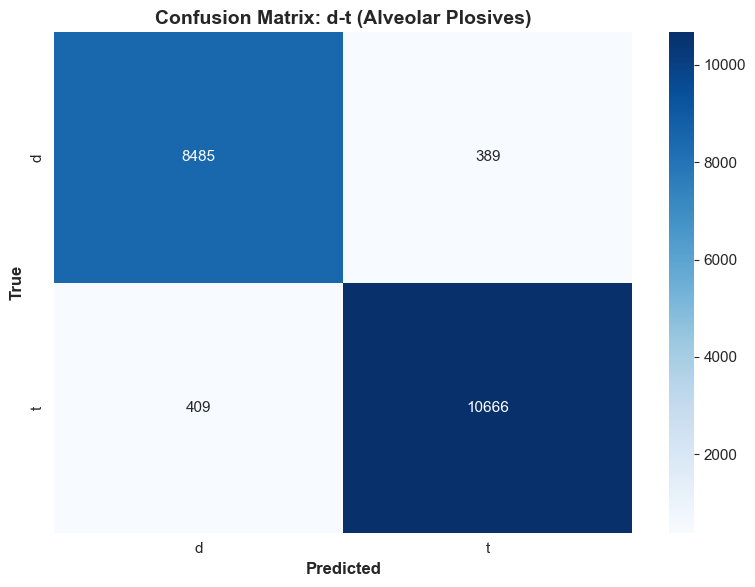


Classification Report:
              precision    recall  f1-score   support

           d     0.9540    0.9562    0.9551      8874
           t     0.9648    0.9631    0.9639     11075

    accuracy                         0.9600     19949
   macro avg     0.9594    0.9596    0.9595     19949
weighted avg     0.9600    0.9600    0.9600     19949



In [25]:
# 1. Confusion Matrix
y_true = predictions_df['true_class_encoded'].values
y_pred = predictions_df['predicted_class_encoded'].values

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=[config['class_0'], config['class_1']],
            yticklabels=[config['class_0'], config['class_1']])
ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax.set_ylabel('True', fontsize=12, fontweight='bold')
ax.set_title(f'Confusion Matrix: {config["name"]}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, 
                          target_names=[config['class_0'], config['class_1']],
                          digits=4))



Loaded features: (132992, 112)
Correct predictions: 19151
Incorrect predictions: 798

Analyzing 109 numeric features...

Top 20 features with largest differences between correct and incorrect predictions:
            feature  correct_mean  incorrect_mean  absolute_diff  relative_diff_pct
  delta_mfcc_mean_3      0.007340        0.963038       0.955698       13019.899414
  delta_mfcc_mean_9     -0.003383       -0.357411       0.354029       10465.790039
 delta_mfcc_mean_10     -0.034514       -0.606369       0.571855        1656.857544
 delta2_mfcc_mean_0      0.935988        3.469741       2.533753         270.703522
  delta_mfcc_mean_0      1.834816        4.689065       2.854249         155.560547
  delta_mfcc_mean_1      1.926896        4.793612       2.866717         148.773849
  delta_mfcc_mean_5     -0.242790       -0.586905       0.344116         141.734116
delta2_mfcc_mean_11      0.089835        0.189288       0.099453         110.705864
  delta_mfcc_mean_2     -0.882697     

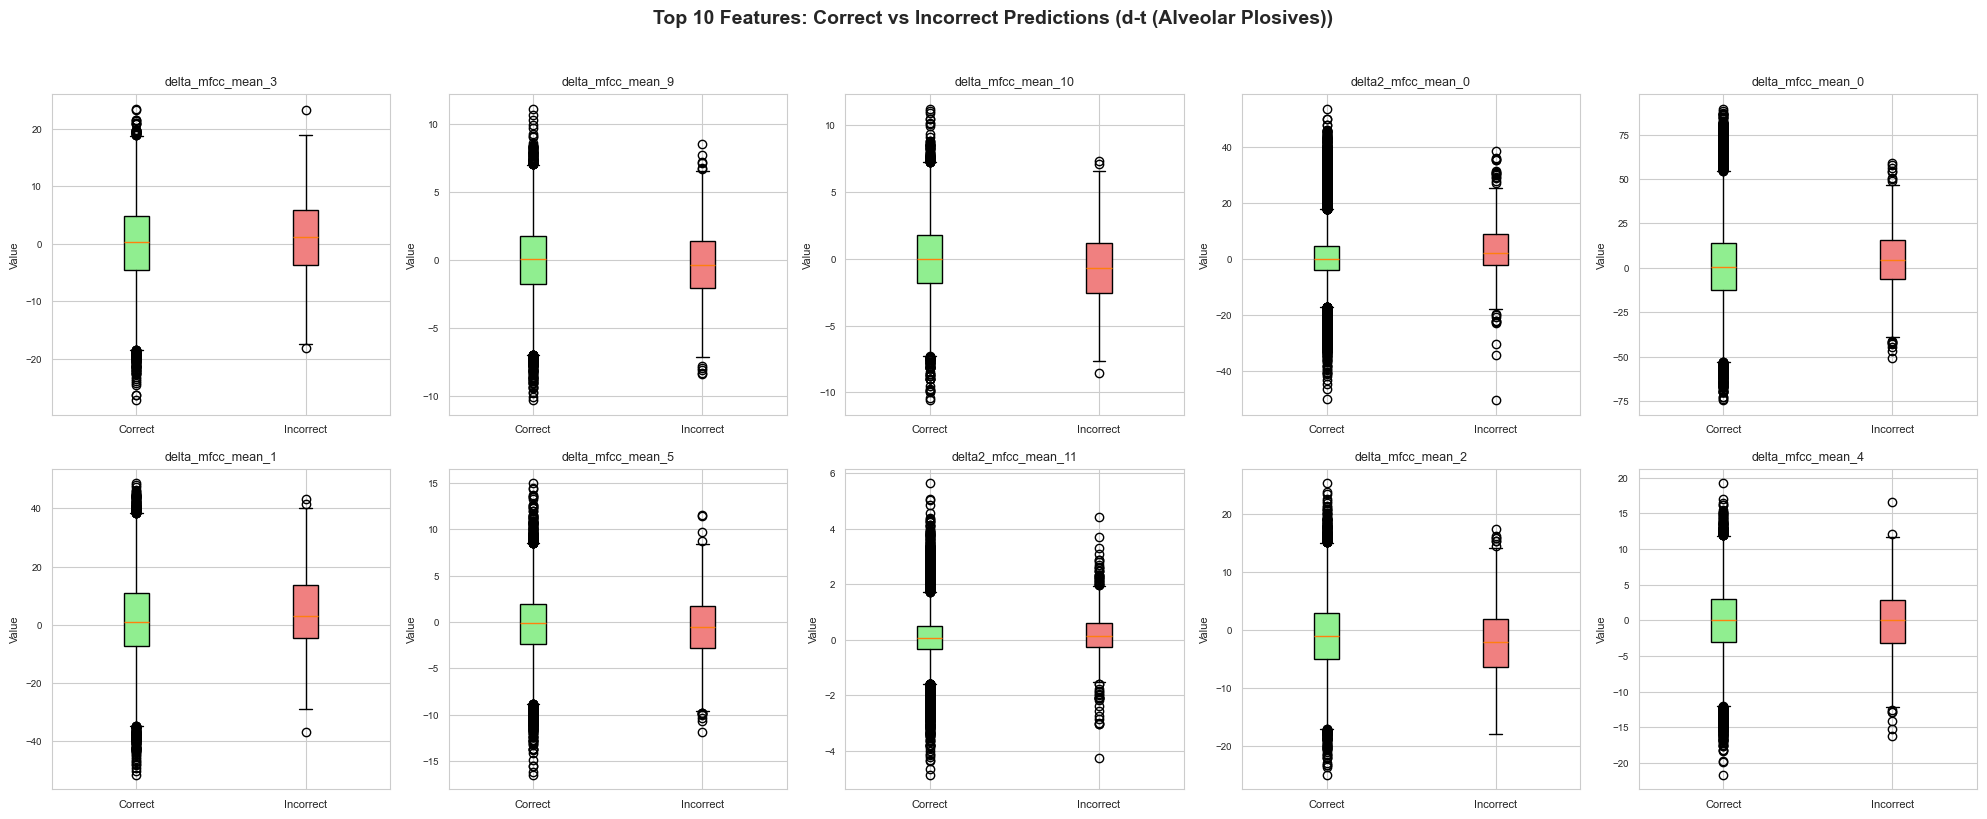

In [26]:
# 2. Load features for misclassified phonemes analysis
try:
    features_df = pd.read_parquet(config['features_path'])
    print(f"\nLoaded features: {features_df.shape}")
    
    # Merge predictions with features
    merged_df = predictions_df.merge(
        features_df[['phoneme_id'] + [col for col in features_df.columns if col not in ['phoneme_id', 'class', 'phoneme', 'utterance_id', 'duration_ms']]],
        on='phoneme_id',
        how='left'
    )
    
    # Separate correct and incorrect predictions
    correct_df = merged_df[merged_df['is_correct'] == 1].copy()
    incorrect_df = merged_df[merged_df['is_correct'] == 0].copy()
    
    print(f"Correct predictions: {len(correct_df)}")
    print(f"Incorrect predictions: {len(incorrect_df)}")
    
    # Get numeric feature columns (exclude metadata)
    feature_cols = [col for col in merged_df.columns 
                   if col not in ['phoneme_id', 'utterance_id', 'phoneme', 'true_class', 
                                 'predicted_class', 'true_class_encoded', 'predicted_class_encoded',
                                 'is_correct', 'confidence', 'max_prob', 'prob_class_0', 'prob_class_1',
                                 'duration_ms', 'class']
                   and pd.api.types.is_numeric_dtype(merged_df[col])]
    
    print(f"\nAnalyzing {len(feature_cols)} numeric features...")
    
    # Calculate mean differences between correct and incorrect predictions
    feature_analysis = []
    for col in feature_cols:
        correct_mean = correct_df[col].mean()
        incorrect_mean = incorrect_df[col].mean()
        diff = abs(correct_mean - incorrect_mean)
        
        # Calculate relative difference
        if correct_mean != 0:
            rel_diff = (diff / abs(correct_mean)) * 100
        else:
            rel_diff = 0
        
        feature_analysis.append({
            'feature': col,
            'correct_mean': correct_mean,
            'incorrect_mean': incorrect_mean,
            'absolute_diff': diff,
            'relative_diff_pct': rel_diff
        })
    
    feature_analysis_df = pd.DataFrame(feature_analysis)
    feature_analysis_df = feature_analysis_df.sort_values('relative_diff_pct', ascending=False)
    
    # Show top 20 features with largest differences
    print("\nTop 20 features with largest differences between correct and incorrect predictions:")
    print(feature_analysis_df.head(20).to_string(index=False))
    
    # Visualize top features
    top_features = feature_analysis_df.head(10)['feature'].values
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    
    for idx, feat in enumerate(top_features):
        ax = axes[idx]
        
        # Box plot comparison
        data_to_plot = [
            correct_df[feat].dropna().values,
            incorrect_df[feat].dropna().values
        ]
        
        bp = ax.boxplot(data_to_plot, labels=['Correct', 'Incorrect'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightgreen')
        bp['boxes'][1].set_facecolor('lightcoral')
        
        ax.set_title(feat[:30] + '...' if len(feat) > 30 else feat, fontsize=9)
        ax.set_ylabel('Value', fontsize=8)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=7)
    
    plt.suptitle(f'Top 10 Features: Correct vs Incorrect Predictions ({config["name"]})', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"\nWarning: Could not load features for analysis: {e}")
    print("Skipping feature analysis...")


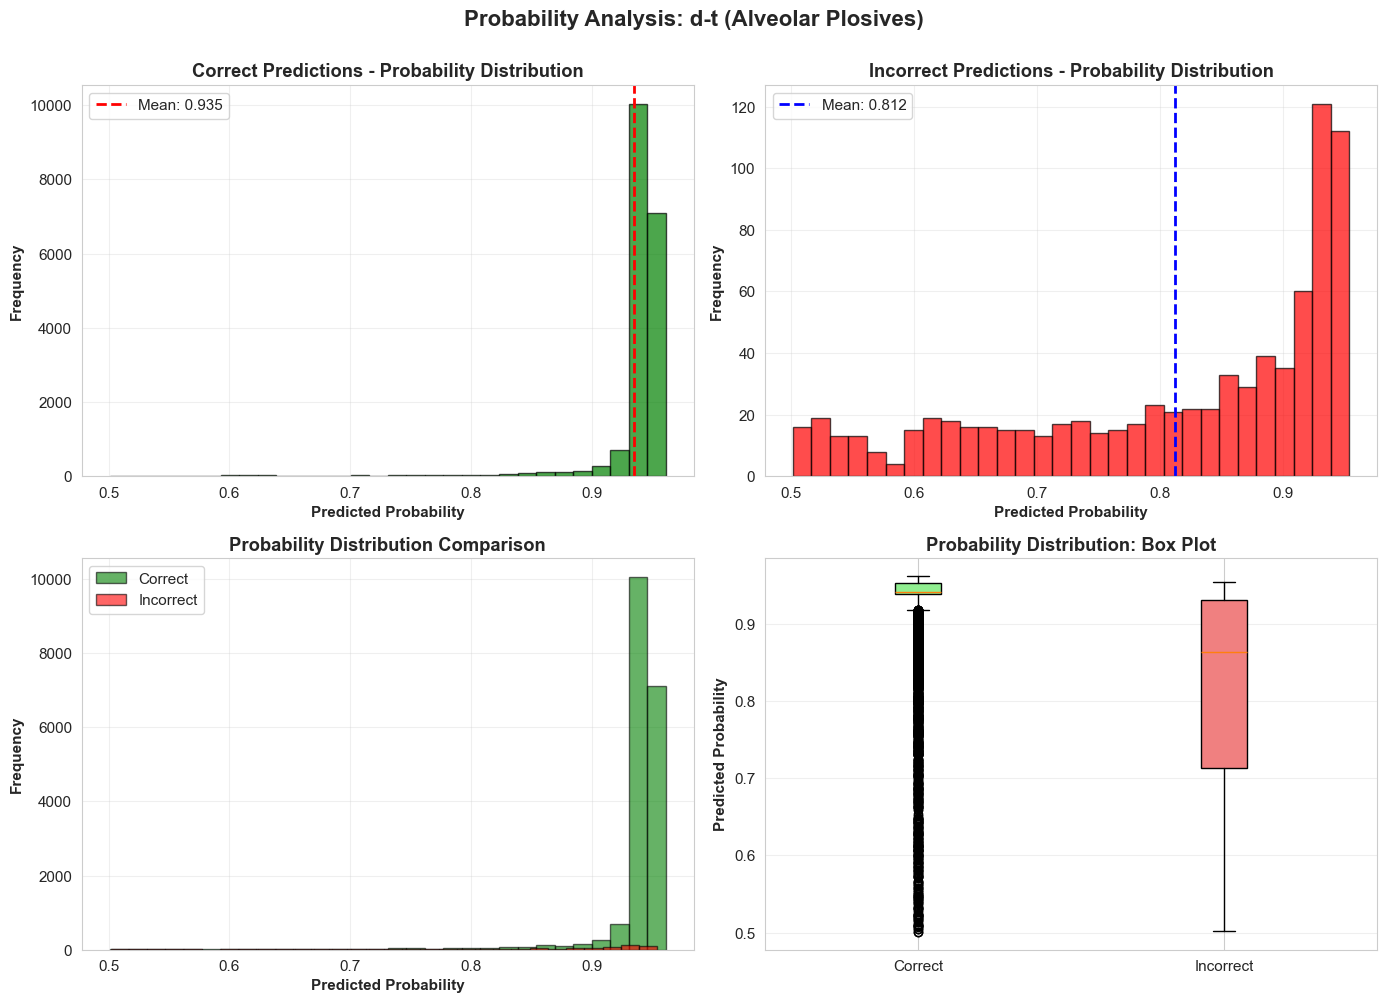


Probability Statistics:
Correct predictions:
  Mean: 0.9349
  Median: 0.9414
  Std: 0.0445
  Min: 0.5008, Max: 0.9614

Incorrect predictions:
  Mean: 0.8121
  Median: 0.8627
  Std: 0.1350
  Min: 0.5016, Max: 0.9542


In [27]:
# 3. Probability Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Correct predictions - probability distribution
correct_probs = predictions_df[predictions_df['is_correct'] == 1]['max_prob'].values
incorrect_probs = predictions_df[predictions_df['is_correct'] == 0]['max_prob'].values

# Plot 1: Histogram of probabilities for correct predictions
ax1 = axes[0, 0]
ax1.hist(correct_probs, bins=30, alpha=0.7, color='green', edgecolor='black')
ax1.axvline(correct_probs.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {correct_probs.mean():.3f}')
ax1.set_xlabel('Predicted Probability', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Correct Predictions - Probability Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram of probabilities for incorrect predictions
ax2 = axes[0, 1]
ax2.hist(incorrect_probs, bins=30, alpha=0.7, color='red', edgecolor='black')
ax2.axvline(incorrect_probs.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {incorrect_probs.mean():.3f}')
ax2.set_xlabel('Predicted Probability', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Incorrect Predictions - Probability Distribution', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Overlay comparison
ax3 = axes[1, 0]
ax3.hist(correct_probs, bins=30, alpha=0.6, color='green', label='Correct', edgecolor='black')
ax3.hist(incorrect_probs, bins=30, alpha=0.6, color='red', label='Incorrect', edgecolor='black')
ax3.set_xlabel('Predicted Probability', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Probability Distribution Comparison', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Box plot comparison
ax4 = axes[1, 1]
bp = ax4.boxplot([correct_probs, incorrect_probs], labels=['Correct', 'Incorrect'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('lightcoral')
ax4.set_ylabel('Predicted Probability', fontweight='bold')
ax4.set_title('Probability Distribution: Box Plot', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Probability Analysis: {config["name"]}', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

# Statistics
print("\nProbability Statistics:")
print(f"Correct predictions:")
print(f"  Mean: {correct_probs.mean():.4f}")
print(f"  Median: {np.median(correct_probs):.4f}")
print(f"  Std: {correct_probs.std():.4f}")
print(f"  Min: {correct_probs.min():.4f}, Max: {correct_probs.max():.4f}")
print(f"\nIncorrect predictions:")
print(f"  Mean: {incorrect_probs.mean():.4f}")
print(f"  Median: {np.median(incorrect_probs):.4f}")
print(f"  Std: {incorrect_probs.std():.4f}")
print(f"  Min: {incorrect_probs.min():.4f}, Max: {incorrect_probs.max():.4f}")


In [28]:
# 4. Detailed analysis of misclassified phonemes by class
print(f"\n{'='*70}")
print(f"Misclassification Analysis: {config['name']}")
print(f"{'='*70}")

# Count misclassifications by true class
misclassified = predictions_df[predictions_df['is_correct'] == 0].copy()

print(f"\nTotal misclassifications: {len(misclassified)}")
print(f"\nMisclassifications by true class:")
for true_class in [config['class_0'], config['class_1']]:
    count = len(misclassified[misclassified['true_class'] == true_class])
    total = len(predictions_df[predictions_df['true_class'] == true_class])
    pct = (count / total) * 100 if total > 0 else 0
    print(f"  {true_class}: {count}/{total} ({pct:.2f}%)")

# Show confusion matrix breakdown
print(f"\nConfusion Matrix Breakdown:")
print(f"  True {config['class_0']} predicted as {config['class_0']}: {cm[0, 0]}")
print(f"  True {config['class_0']} predicted as {config['class_1']}: {cm[0, 1]}")
print(f"  True {config['class_1']} predicted as {config['class_0']}: {cm[1, 0]}")
print(f"  True {config['class_1']} predicted as {config['class_1']}: {cm[1, 1]}")

# Analyze misclassified by probability
if len(misclassified) > 0:
    print(f"\nMisclassified phonemes with highest confidence (most confident errors):")
    top_errors = misclassified.nlargest(10, 'max_prob')[['phoneme_id', 'true_class', 'predicted_class', 'max_prob']]
    print(top_errors.to_string(index=False))
    
    print(f"\nMisclassified phonemes with lowest confidence (uncertain errors):")
    low_errors = misclassified.nsmallest(10, 'max_prob')[['phoneme_id', 'true_class', 'predicted_class', 'max_prob']]
    print(low_errors.to_string(index=False))



Misclassification Analysis: d-t (Alveolar Plosives)

Total misclassifications: 798

Misclassifications by true class:
  d: 389/8874 (4.38%)
  t: 409/11075 (3.69%)

Confusion Matrix Breakdown:
  True d predicted as d: 8485
  True d predicted as t: 389
  True t predicted as d: 409
  True t predicted as t: 10666

Misclassified phonemes with highest confidence (most confident errors):
 phoneme_id true_class predicted_class  max_prob
      32981          t               d  0.954169
      63678          t               d  0.953537
       6997          t               d  0.953533
     113786          t               d  0.952983
      50622          t               d  0.952953
     121175          t               d  0.952931
      38811          t               d  0.952929
      47651          t               d  0.952820
     101346          t               d  0.952784
     122925          t               d  0.952730

Misclassified phonemes with lowest confidence (uncertain errors):
 phoneme_

## Part 3: Analysis of g-k Pair (Velar Plosives)


In [29]:
# Load data for g-k pair
pair_key = 'g-k'
config = PAIRS_CONFIG[pair_key]

print(f"\n{'='*70}")
print(f"Analyzing: {config['name']}")
print(f"{'='*70}")

# Load predictions
predictions_df = pd.read_csv(config['predictions_path'])
print(f"\nLoaded {len(predictions_df)} predictions")
print(f"Correct: {predictions_df['is_correct'].sum()}, Incorrect: {(~predictions_df['is_correct'].astype(bool)).sum()}")

# Load metrics
with open(config['metrics_path'], 'r') as f:
    metrics = json.load(f)

print(f"\nModel Performance:")
print(f"  Accuracy: {metrics['accuracy']:.4f}")
print(f"  F1-score: {metrics['f1']:.4f}")
print(f"  Precision: {metrics['precision']:.4f}")
print(f"  Recall: {metrics['recall']:.4f}")
print(f"  ROC-AUC: {metrics['roc_auc']:.4f}")



Analyzing: g-k (Velar Plosives)

Loaded 5698 predictions
Correct: 5495, Incorrect: 203

Model Performance:
  Accuracy: 0.9644
  F1-score: 0.9644
  Precision: 0.9644
  Recall: 0.9644
  ROC-AUC: 0.9846


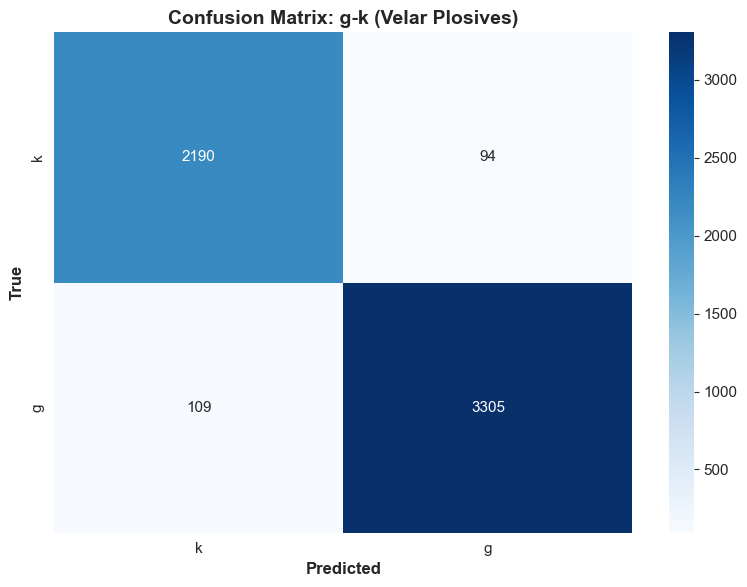


Classification Report:
              precision    recall  f1-score   support

           k     0.9526    0.9588    0.9557      2284
           ɡ     0.9723    0.9681    0.9702      3414

    accuracy                         0.9644      5698
   macro avg     0.9625    0.9635    0.9630      5698
weighted avg     0.9644    0.9644    0.9644      5698



In [30]:
# 1. Confusion Matrix
y_true = predictions_df['true_class_encoded'].values
y_pred = predictions_df['predicted_class_encoded'].values

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=[config['class_0'], config['class_1']],
            yticklabels=[config['class_0'], config['class_1']])
ax.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax.set_ylabel('True', fontsize=12, fontweight='bold')
ax.set_title(f'Confusion Matrix: {config["name"]}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, 
                          target_names=[config['class_0'], config['class_1']],
                          digits=4))



Loaded features: (37986, 112)
Correct predictions: 5495
Incorrect predictions: 203

Analyzing 109 numeric features...

Top 20 features with largest differences between correct and incorrect predictions:
            feature  correct_mean  incorrect_mean  absolute_diff  relative_diff_pct
  delta_mfcc_mean_3     -0.072670       -0.945337       0.872667        1200.863159
  delta_mfcc_mean_8     -0.091343       -0.893627       0.802284         878.320312
  delta_mfcc_mean_4      0.468543       -1.246132       1.714675         365.959320
  delta_mfcc_mean_9      0.219558        0.864256       0.644698         293.634369
  delta_mfcc_mean_0     -2.159574        3.899001       6.058576         280.544952
        mfcc_mean_2     -1.083564       -4.038007       2.954443         272.659790
  delta_mfcc_mean_1     -1.726491        2.195665       3.922157         227.174973
 delta2_mfcc_mean_1     -0.963011        1.176821       2.139832         222.202301
  delta_mfcc_mean_2     -0.516740       

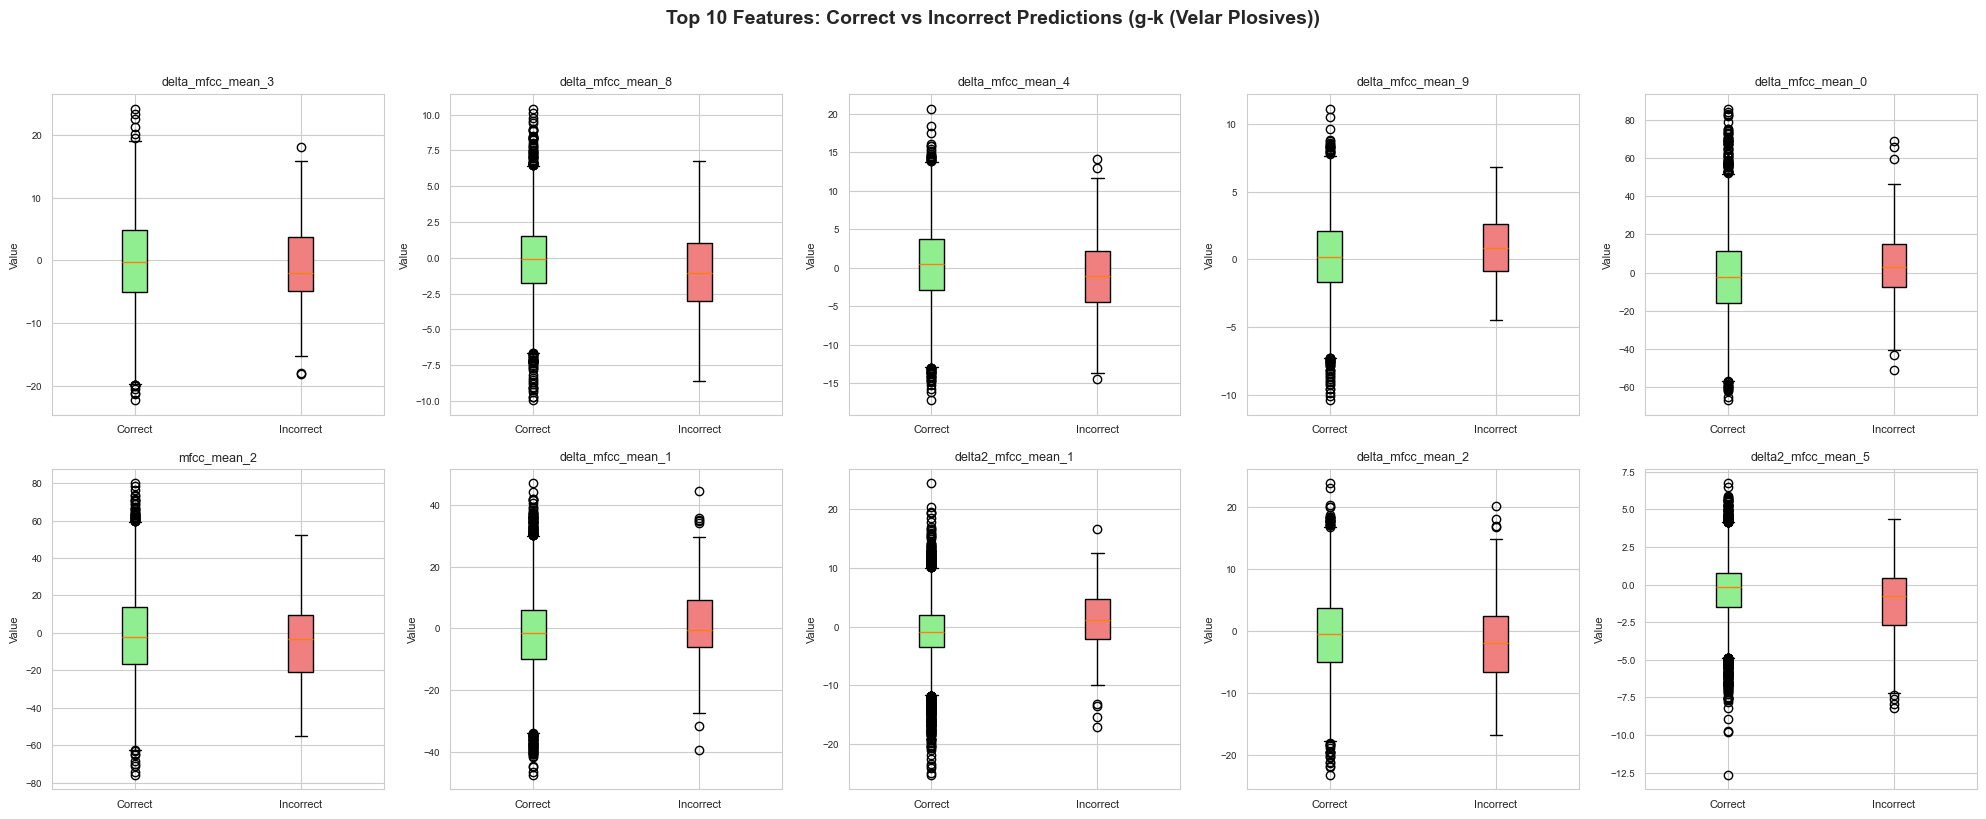

In [31]:
# 2. Load features for misclassified phonemes analysis
try:
    features_df = pd.read_parquet(config['features_path'])
    print(f"\nLoaded features: {features_df.shape}")
    
    # Merge predictions with features
    merged_df = predictions_df.merge(
        features_df[['phoneme_id'] + [col for col in features_df.columns if col not in ['phoneme_id', 'class', 'phoneme', 'utterance_id', 'duration_ms']]],
        on='phoneme_id',
        how='left'
    )
    
    # Separate correct and incorrect predictions
    correct_df = merged_df[merged_df['is_correct'] == 1].copy()
    incorrect_df = merged_df[merged_df['is_correct'] == 0].copy()
    
    print(f"Correct predictions: {len(correct_df)}")
    print(f"Incorrect predictions: {len(incorrect_df)}")
    
    # Get numeric feature columns (exclude metadata)
    feature_cols = [col for col in merged_df.columns 
                   if col not in ['phoneme_id', 'utterance_id', 'phoneme', 'true_class', 
                                 'predicted_class', 'true_class_encoded', 'predicted_class_encoded',
                                 'is_correct', 'confidence', 'max_prob', 'prob_class_0', 'prob_class_1',
                                 'duration_ms', 'class']
                   and pd.api.types.is_numeric_dtype(merged_df[col])]
    
    print(f"\nAnalyzing {len(feature_cols)} numeric features...")
    
    # Calculate mean differences between correct and incorrect predictions
    feature_analysis = []
    for col in feature_cols:
        correct_mean = correct_df[col].mean()
        incorrect_mean = incorrect_df[col].mean()
        diff = abs(correct_mean - incorrect_mean)
        
        # Calculate relative difference
        if correct_mean != 0:
            rel_diff = (diff / abs(correct_mean)) * 100
        else:
            rel_diff = 0
        
        feature_analysis.append({
            'feature': col,
            'correct_mean': correct_mean,
            'incorrect_mean': incorrect_mean,
            'absolute_diff': diff,
            'relative_diff_pct': rel_diff
        })
    
    feature_analysis_df = pd.DataFrame(feature_analysis)
    feature_analysis_df = feature_analysis_df.sort_values('relative_diff_pct', ascending=False)
    
    # Show top 20 features with largest differences
    print("\nTop 20 features with largest differences between correct and incorrect predictions:")
    print(feature_analysis_df.head(20).to_string(index=False))
    
    # Visualize top features
    top_features = feature_analysis_df.head(10)['feature'].values
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    
    for idx, feat in enumerate(top_features):
        ax = axes[idx]
        
        # Box plot comparison
        data_to_plot = [
            correct_df[feat].dropna().values,
            incorrect_df[feat].dropna().values
        ]
        
        bp = ax.boxplot(data_to_plot, labels=['Correct', 'Incorrect'], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightgreen')
        bp['boxes'][1].set_facecolor('lightcoral')
        
        ax.set_title(feat[:30] + '...' if len(feat) > 30 else feat, fontsize=9)
        ax.set_ylabel('Value', fontsize=8)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=7)
    
    plt.suptitle(f'Top 10 Features: Correct vs Incorrect Predictions ({config["name"]})', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"\nWarning: Could not load features for analysis: {e}")
    print("Skipping feature analysis...")


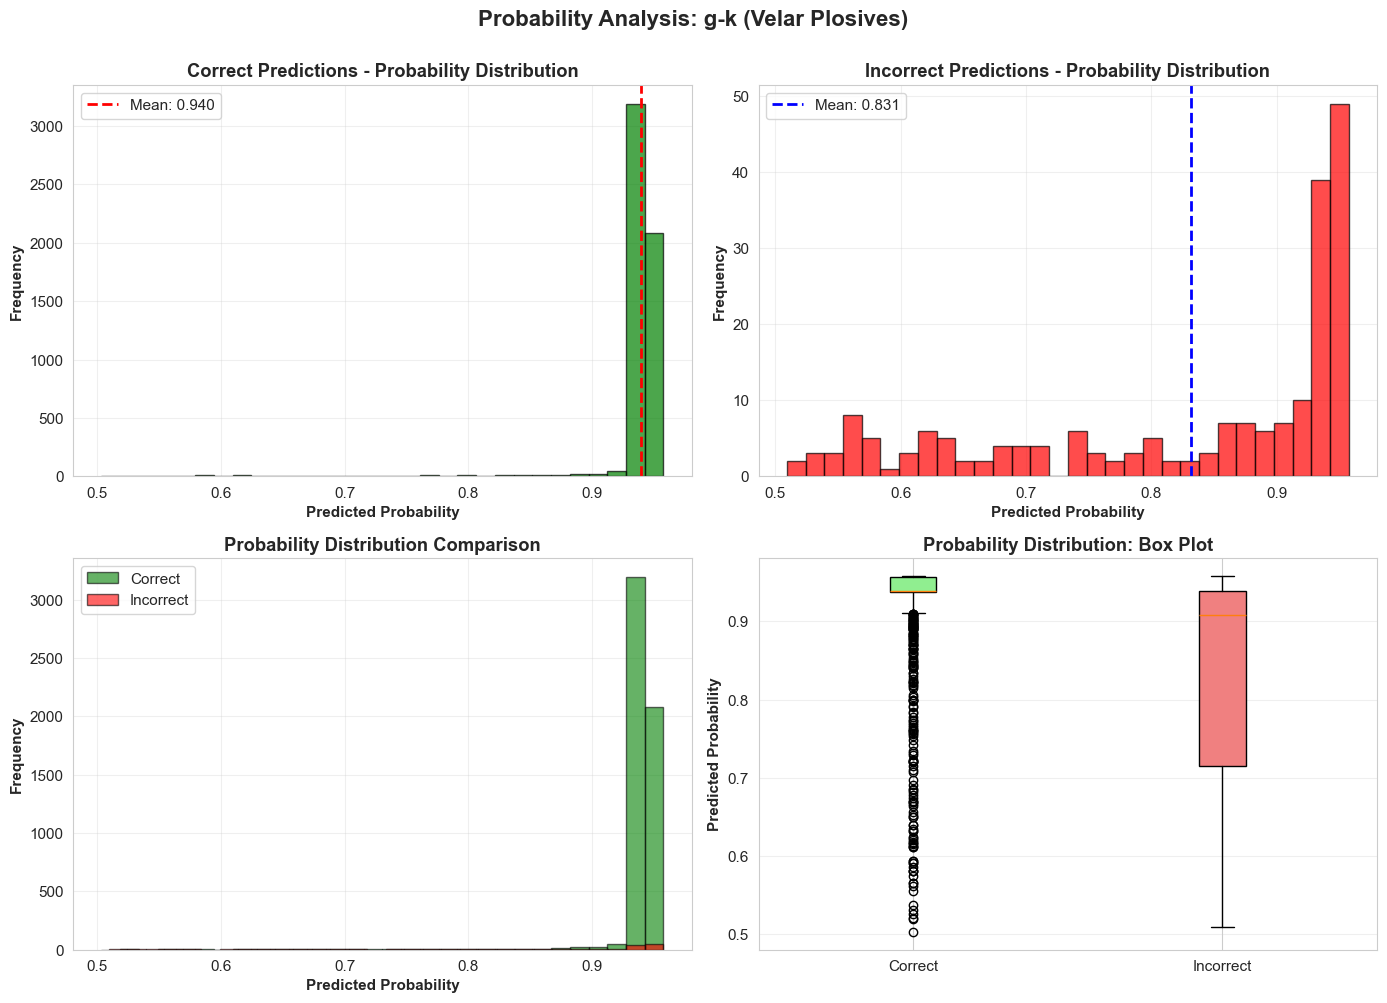


Probability Statistics:
Correct predictions:
  Mean: 0.9400
  Median: 0.9387
  Std: 0.0371
  Min: 0.5032, Max: 0.9579

Incorrect predictions:
  Mean: 0.8313
  Median: 0.9089
  Std: 0.1420
  Min: 0.5091, Max: 0.9578


In [32]:
# 3. Probability Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Correct predictions - probability distribution
correct_probs = predictions_df[predictions_df['is_correct'] == 1]['max_prob'].values
incorrect_probs = predictions_df[predictions_df['is_correct'] == 0]['max_prob'].values

# Plot 1: Histogram of probabilities for correct predictions
ax1 = axes[0, 0]
ax1.hist(correct_probs, bins=30, alpha=0.7, color='green', edgecolor='black')
ax1.axvline(correct_probs.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {correct_probs.mean():.3f}')
ax1.set_xlabel('Predicted Probability', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Correct Predictions - Probability Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram of probabilities for incorrect predictions
ax2 = axes[0, 1]
ax2.hist(incorrect_probs, bins=30, alpha=0.7, color='red', edgecolor='black')
ax2.axvline(incorrect_probs.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {incorrect_probs.mean():.3f}')
ax2.set_xlabel('Predicted Probability', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('Incorrect Predictions - Probability Distribution', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Overlay comparison
ax3 = axes[1, 0]
ax3.hist(correct_probs, bins=30, alpha=0.6, color='green', label='Correct', edgecolor='black')
ax3.hist(incorrect_probs, bins=30, alpha=0.6, color='red', label='Incorrect', edgecolor='black')
ax3.set_xlabel('Predicted Probability', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Probability Distribution Comparison', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Box plot comparison
ax4 = axes[1, 1]
bp = ax4.boxplot([correct_probs, incorrect_probs], labels=['Correct', 'Incorrect'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('lightcoral')
ax4.set_ylabel('Predicted Probability', fontweight='bold')
ax4.set_title('Probability Distribution: Box Plot', fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'Probability Analysis: {config["name"]}', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

# Statistics
print("\nProbability Statistics:")
print(f"Correct predictions:")
print(f"  Mean: {correct_probs.mean():.4f}")
print(f"  Median: {np.median(correct_probs):.4f}")
print(f"  Std: {correct_probs.std():.4f}")
print(f"  Min: {correct_probs.min():.4f}, Max: {correct_probs.max():.4f}")
print(f"\nIncorrect predictions:")
print(f"  Mean: {incorrect_probs.mean():.4f}")
print(f"  Median: {np.median(incorrect_probs):.4f}")
print(f"  Std: {incorrect_probs.std():.4f}")
print(f"  Min: {incorrect_probs.min():.4f}, Max: {incorrect_probs.max():.4f}")


In [33]:
# 4. Detailed analysis of misclassified phonemes by class
print(f"\n{'='*70}")
print(f"Misclassification Analysis: {config['name']}")
print(f"{'='*70}")

# Count misclassifications by true class
misclassified = predictions_df[predictions_df['is_correct'] == 0].copy()

print(f"\nTotal misclassifications: {len(misclassified)}")
print(f"\nMisclassifications by true class:")
for true_class in [config['class_0'], config['class_1']]:
    count = len(misclassified[misclassified['true_class'] == true_class])
    total = len(predictions_df[predictions_df['true_class'] == true_class])
    pct = (count / total) * 100 if total > 0 else 0
    print(f"  {true_class}: {count}/{total} ({pct:.2f}%)")

# Show confusion matrix breakdown
print(f"\nConfusion Matrix Breakdown:")
print(f"  True {config['class_0']} predicted as {config['class_0']}: {cm[0, 0]}")
print(f"  True {config['class_0']} predicted as {config['class_1']}: {cm[0, 1]}")
print(f"  True {config['class_1']} predicted as {config['class_0']}: {cm[1, 0]}")
print(f"  True {config['class_1']} predicted as {config['class_1']}: {cm[1, 1]}")

# Analyze misclassified by probability
if len(misclassified) > 0:
    print(f"\nMisclassified phonemes with highest confidence (most confident errors):")
    top_errors = misclassified.nlargest(10, 'max_prob')[['phoneme_id', 'true_class', 'predicted_class', 'max_prob']]
    print(top_errors.to_string(index=False))
    
    print(f"\nMisclassified phonemes with lowest confidence (uncertain errors):")
    low_errors = misclassified.nsmallest(10, 'max_prob')[['phoneme_id', 'true_class', 'predicted_class', 'max_prob']]
    print(low_errors.to_string(index=False))



Misclassification Analysis: g-k (Velar Plosives)

Total misclassifications: 203

Misclassifications by true class:
  k: 94/2284 (4.12%)
  ɡ: 109/3414 (3.19%)

Confusion Matrix Breakdown:
  True k predicted as k: 2190
  True k predicted as ɡ: 94
  True ɡ predicted as k: 109
  True ɡ predicted as ɡ: 3305

Misclassified phonemes with highest confidence (most confident errors):
 phoneme_id true_class predicted_class  max_prob
      16449          ɡ               k  0.957760
      21455          ɡ               k  0.957709
      22449          ɡ               k  0.957561
       8306          ɡ               k  0.957533
      37350          ɡ               k  0.957531
      18863          ɡ               k  0.957389
      17861          ɡ               k  0.957306
      17133          ɡ               k  0.957292
      23403          ɡ               k  0.957229
       9050          ɡ               k  0.957221

Misclassified phonemes with lowest confidence (uncertain errors):
 phoneme_id true

## Summary: Comparison Across All Pairs



Performance Comparison Across All Phoneme Pairs
                   Pair  Accuracy  F1-Score  Precision   Recall  ROC-AUC
b-p (Bilabial Plosives)  0.965318  0.965386   0.965489 0.965318 0.990336
d-t (Alveolar Plosives)  0.959998  0.960002   0.960009 0.959998 0.991526
   g-k (Velar Plosives)  0.964373  0.964393   0.964425 0.964373 0.984579


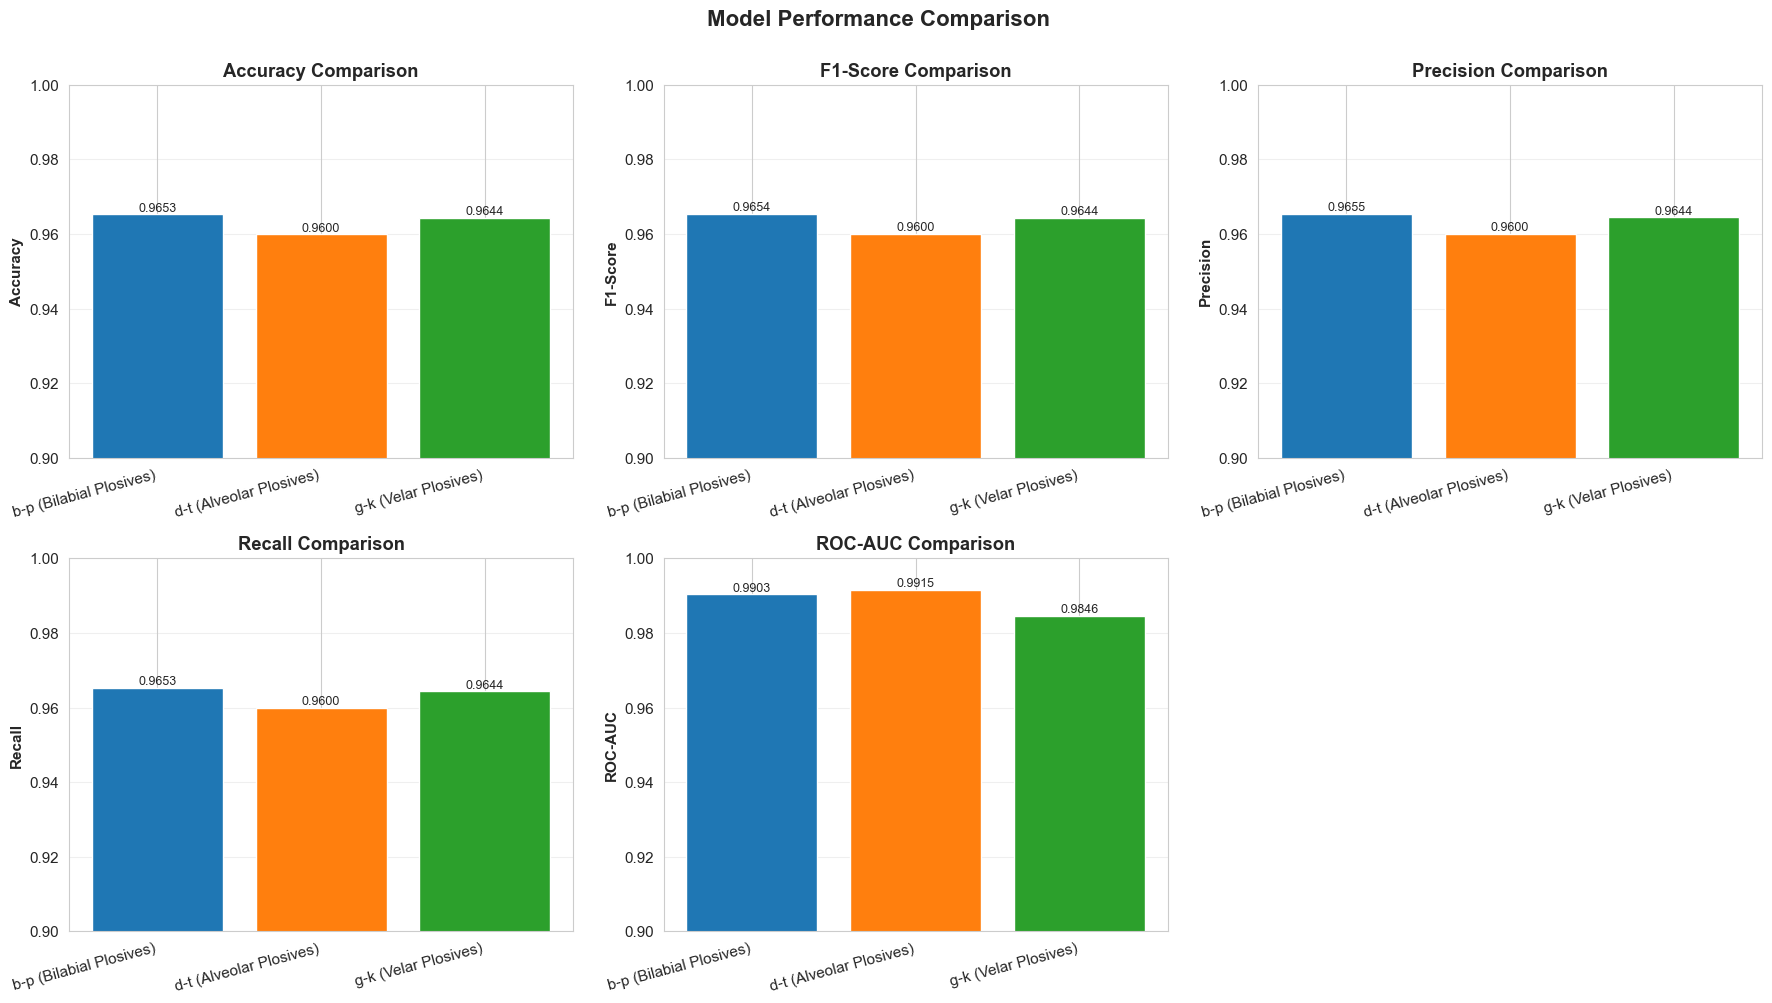

In [34]:
# Load all metrics for comparison
all_metrics = {}
for pair_key, config in PAIRS_CONFIG.items():
    try:
        with open(config['metrics_path'], 'r') as f:
            all_metrics[pair_key] = json.load(f)
    except Exception as e:
        print(f"Warning: Could not load metrics for {pair_key}: {e}")

# Create comparison DataFrame
comparison_data = []
for pair_key, metrics in all_metrics.items():
    comparison_data.append({
        'Pair': PAIRS_CONFIG[pair_key]['name'],
        'Accuracy': metrics['accuracy'],
        'F1-Score': metrics['f1'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'ROC-AUC': metrics['roc_auc']
    })

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*70)
print("Performance Comparison Across All Phoneme Pairs")
print("="*70)
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'ROC-AUC']
for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx]
    bars = ax.bar(comparison_df['Pair'], comparison_df[metric], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    ax.set_ylabel(metric, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontweight='bold')
    ax.set_ylim([0.9, 1.0])
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)
    
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=15, ha='right')

# Remove extra subplot
fig.delaxes(axes[5])

plt.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()


## Part 4: Production Readiness Assessment


PRODUCTION READINESS ASSESSMENT

Detailed Metrics:
                   Pair  Accuracy  F1-Score  ROC-AUC      ECE  Brier Score  High Conf Errors  Low Conf Correct  Class Balance  Max Class Error Diff  Mean Correct Prob  Mean Incorrect Prob  Prob Separation
b-p (Bilabial Plosives)  0.965318  0.965386 0.990336 0.054273     0.030840                86                50       0.415857              0.024910           0.925873             0.819499         0.106374
d-t (Alveolar Plosives)  0.959998  0.960002 0.991526 0.043292     0.033078               315               222       0.801264              0.006906           0.934884             0.812065         0.122819
   g-k (Velar Plosives)  0.964373  0.964393 0.984579 0.040452     0.030139               105                49       0.669010              0.009229           0.939994             0.831334         0.108659

ASSESSMENT BY CRITERIA

                   Pair  Total Score Status  Accuracy  ROC-AUC      ECE  Brier  High Conf Errors  Class 

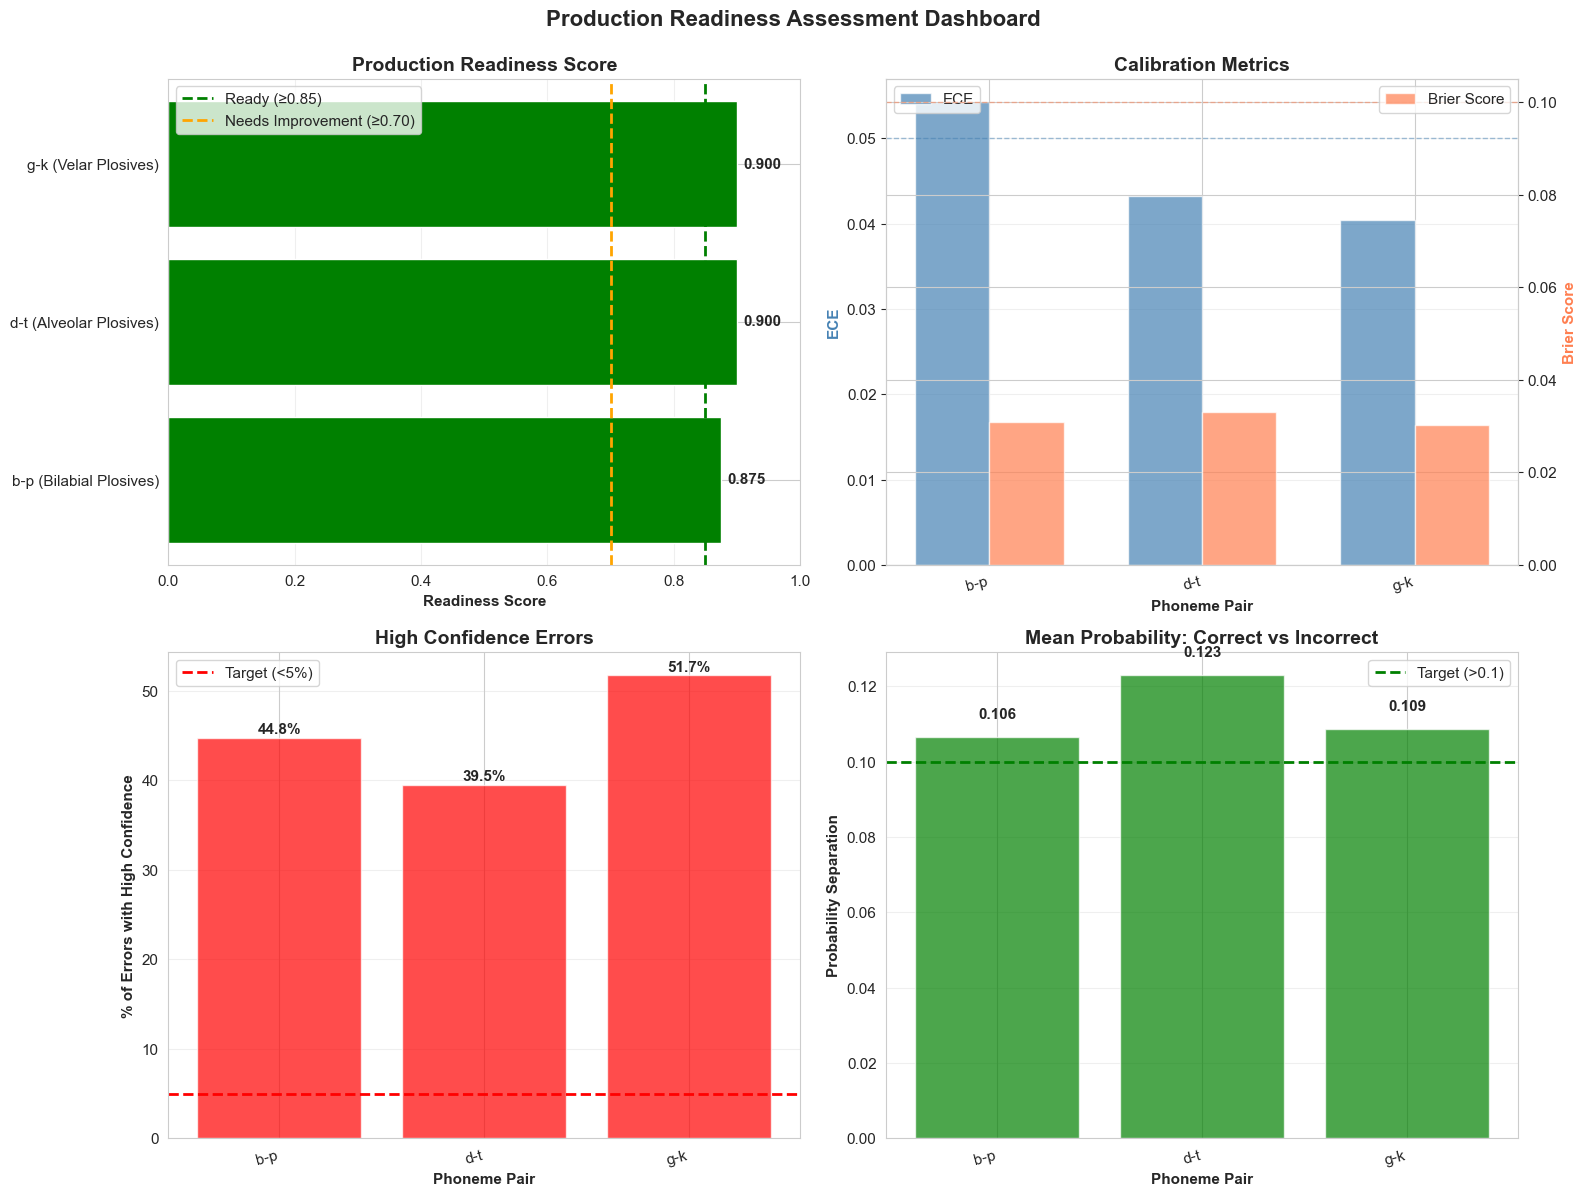


RECOMMENDATIONS

b-p (Bilabial Plosives): READY

d-t (Alveolar Plosives): READY

g-k (Velar Plosives): READY


In [35]:
# Production Readiness Assessment
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
from scipy import stats

def calculate_ece(y_true, y_prob, n_bins=10):
    """Calculate Expected Calibration Error"""
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    
    ece = 0
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (y_prob > bin_lower) & (y_prob <= bin_upper)
        prop_in_bin = in_bin.mean()
        
        if prop_in_bin > 0:
            accuracy_in_bin = y_true[in_bin].mean()
            avg_confidence_in_bin = y_prob[in_bin].mean()
            ece += np.abs(avg_confidence_in_bin - accuracy_in_bin) * prop_in_bin
    
    return ece

# Load all predictions
all_predictions = {}
for pair_key, config in PAIRS_CONFIG.items():
    predictions_df = pd.read_csv(config['predictions_path'])
    all_predictions[pair_key] = predictions_df

# Production readiness criteria
readiness_data = []

for pair_key, config in PAIRS_CONFIG.items():
    predictions_df = all_predictions[pair_key]
    metrics = all_metrics[pair_key]
    
    # Calculate additional metrics
    y_true = predictions_df['true_class_encoded'].values
    y_prob = predictions_df['prob_class_1'].values
    
    # Calibration metrics
    ece = calculate_ece(y_true, y_prob)
    brier = brier_score_loss(y_true, y_prob)
    
    # Error analysis
    correct_probs = predictions_df[predictions_df['is_correct'] == 1]['max_prob'].values
    incorrect_probs = predictions_df[predictions_df['is_correct'] == 0]['max_prob'].values
    
    high_confidence_errors = len(predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] > 0.9)
    ])
    low_confidence_correct = len(predictions_df[
        (predictions_df['is_correct'] == 1) & (predictions_df['max_prob'] < 0.7)
    ])
    
    # Class balance
    class_counts = predictions_df['true_class'].value_counts()
    class_balance_ratio = min(class_counts) / max(class_counts)
    
    # Error rate by class
    error_by_class = {}
    for cls in [config['class_0'], config['class_1']]:
        cls_df = predictions_df[predictions_df['true_class'] == cls]
        error_rate = (cls_df['is_correct'] == 0).sum() / len(cls_df)
        error_by_class[cls] = error_rate
    
    max_class_error_diff = abs(error_by_class[config['class_0']] - error_by_class[config['class_1']])
    
    readiness_data.append({
        'Pair': config['name'],
        'Accuracy': metrics['accuracy'],
        'F1-Score': metrics['f1'],
        'ROC-AUC': metrics['roc_auc'],
        'ECE': ece,
        'Brier Score': brier,
        'High Conf Errors': high_confidence_errors,
        'Low Conf Correct': low_confidence_correct,
        'Class Balance': class_balance_ratio,
        'Max Class Error Diff': max_class_error_diff,
        'Mean Correct Prob': correct_probs.mean(),
        'Mean Incorrect Prob': incorrect_probs.mean() if len(incorrect_probs) > 0 else 0,
        'Prob Separation': correct_probs.mean() - (incorrect_probs.mean() if len(incorrect_probs) > 0 else 0)
    })

readiness_df = pd.DataFrame(readiness_data)

print("="*80)
print("PRODUCTION READINESS ASSESSMENT")
print("="*80)
print("\nDetailed Metrics:")
print(readiness_df.to_string(index=False))

# Assessment scores
print("\n" + "="*80)
print("ASSESSMENT BY CRITERIA")
print("="*80)

assessment_criteria = {
    'Accuracy (>95%)': {'threshold': 0.95, 'weight': 0.25},
    'ROC-AUC (>98%)': {'threshold': 0.98, 'weight': 0.20},
    'ECE (<0.05)': {'threshold': 0.05, 'reverse': True, 'weight': 0.15},
    'Brier Score (<0.1)': {'threshold': 0.1, 'reverse': True, 'weight': 0.15},
    'High Conf Errors (<5%)': {'threshold': 0.05, 'reverse': True, 'weight': 0.10},
    'Class Balance (>0.4)': {'threshold': 0.4, 'weight': 0.10},
    'Class Error Parity (<0.02)': {'threshold': 0.02, 'reverse': True, 'weight': 0.05}
}

assessment_results = []
for pair_key, config in PAIRS_CONFIG.items():
    row = readiness_df[readiness_df['Pair'] == config['name']].iloc[0]
    scores = {}
    total_score = 0
    
    # Accuracy
    acc_score = 1.0 if row['Accuracy'] >= 0.95 else row['Accuracy'] / 0.95
    scores['Accuracy'] = acc_score
    total_score += acc_score * 0.25
    
    # ROC-AUC
    roc_score = 1.0 if row['ROC-AUC'] >= 0.98 else row['ROC-AUC'] / 0.98
    scores['ROC-AUC'] = roc_score
    total_score += roc_score * 0.20
    
    # ECE (lower is better)
    ece_score = 1.0 if row['ECE'] <= 0.05 else max(0, 1 - (row['ECE'] - 0.05) / 0.05)
    scores['ECE'] = ece_score
    total_score += ece_score * 0.15
    
    # Brier Score (lower is better)
    brier_score_val = 1.0 if row['Brier Score'] <= 0.1 else max(0, 1 - (row['Brier Score'] - 0.1) / 0.1)
    scores['Brier'] = brier_score_val
    total_score += brier_score_val * 0.15
    
    # High confidence errors (lower is better)
    total_errors = len(all_predictions[pair_key][all_predictions[pair_key]['is_correct'] == 0])
    hce_rate = row['High Conf Errors'] / total_errors if total_errors > 0 else 0
    hce_score = 1.0 if hce_rate <= 0.05 else max(0, 1 - (hce_rate - 0.05) / 0.05)
    scores['High Conf Errors'] = hce_score
    total_score += hce_score * 0.10
    
    # Class balance
    cb_score = min(1.0, row['Class Balance'] / 0.4)
    scores['Class Balance'] = cb_score
    total_score += cb_score * 0.10
    
    # Class error parity
    cep_score = 1.0 if row['Max Class Error Diff'] <= 0.02 else max(0, 1 - (row['Max Class Error Diff'] - 0.02) / 0.02)
    scores['Error Parity'] = cep_score
    total_score += cep_score * 0.05
    
    assessment_results.append({
        'Pair': config['name'],
        'Total Score': total_score,
        'Status': 'READY' if total_score >= 0.85 else 'NEEDS IMPROVEMENT' if total_score >= 0.70 else 'NOT READY',
        **scores
    })

assessment_df = pd.DataFrame(assessment_results)
print("\n" + assessment_df.to_string(index=False))

# Visualize assessment
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall readiness scores
ax1 = axes[0, 0]
colors = ['green' if s >= 0.85 else 'orange' if s >= 0.70 else 'red' 
          for s in assessment_df['Total Score']]
bars = ax1.barh(assessment_df['Pair'], assessment_df['Total Score'], color=colors)
ax1.set_xlabel('Readiness Score', fontweight='bold')
ax1.set_title('Production Readiness Score', fontweight='bold', fontsize=14)
ax1.set_xlim([0, 1])
ax1.axvline(0.85, color='green', linestyle='--', linewidth=2, label='Ready (≥0.85)')
ax1.axvline(0.70, color='orange', linestyle='--', linewidth=2, label='Needs Improvement (≥0.70)')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')
for i, (bar, score) in enumerate(zip(bars, assessment_df['Total Score'])):
    ax1.text(score + 0.01, i, f'{score:.3f}', va='center', fontweight='bold')

# 2. Calibration metrics
ax2 = axes[0, 1]
x = np.arange(len(readiness_df))
width = 0.35
ax2.bar(x - width/2, readiness_df['ECE'], width, label='ECE', color='steelblue', alpha=0.7)
ax2_twin = ax2.twinx()
ax2_twin.bar(x + width/2, readiness_df['Brier Score'], width, label='Brier Score', color='coral', alpha=0.7)
ax2.set_xlabel('Phoneme Pair', fontweight='bold')
ax2.set_ylabel('ECE', fontweight='bold', color='steelblue')
ax2_twin.set_ylabel('Brier Score', fontweight='bold', color='coral')
ax2.set_xticks(x)
ax2.set_xticklabels([name.split('(')[0].strip() for name in readiness_df['Pair']], rotation=15, ha='right')
ax2.set_title('Calibration Metrics', fontweight='bold', fontsize=14)
ax2.axhline(0.05, color='steelblue', linestyle='--', linewidth=1, alpha=0.5)
ax2_twin.axhline(0.1, color='coral', linestyle='--', linewidth=1, alpha=0.5)
ax2.grid(True, alpha=0.3, axis='y')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# 3. Error analysis
ax3 = axes[1, 0]
total_samples = [len(all_predictions[k]) for k in PAIRS_CONFIG.keys()]
high_conf_errors_pct = [readiness_df.iloc[i]['High Conf Errors'] / 
                        len(all_predictions[list(PAIRS_CONFIG.keys())[i]][
                            all_predictions[list(PAIRS_CONFIG.keys())[i]]['is_correct'] == 0
                        ]) * 100 if len(all_predictions[list(PAIRS_CONFIG.keys())[i]][
                            all_predictions[list(PAIRS_CONFIG.keys())[i]]['is_correct'] == 0
                        ]) > 0 else 0 for i in range(len(PAIRS_CONFIG))]
ax3.bar(x, high_conf_errors_pct, color='red', alpha=0.7)
ax3.set_xlabel('Phoneme Pair', fontweight='bold')
ax3.set_ylabel('% of Errors with High Confidence', fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([name.split('(')[0].strip() for name in readiness_df['Pair']], rotation=15, ha='right')
ax3.set_title('High Confidence Errors', fontweight='bold', fontsize=14)
ax3.axhline(5, color='red', linestyle='--', linewidth=2, label='Target (<5%)')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(high_conf_errors_pct):
    ax3.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# 4. Probability separation
ax4 = axes[1, 1]
ax4.bar(x, readiness_df['Prob Separation'], color='green', alpha=0.7)
ax4.set_xlabel('Phoneme Pair', fontweight='bold')
ax4.set_ylabel('Probability Separation', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([name.split('(')[0].strip() for name in readiness_df['Pair']], rotation=15, ha='right')
ax4.set_title('Mean Probability: Correct vs Incorrect', fontweight='bold', fontsize=14)
ax4.axhline(0.1, color='green', linestyle='--', linewidth=2, label='Target (>0.1)')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(readiness_df['Prob Separation']):
    ax4.text(i, v + 0.005, f'{v:.3f}', ha='center', fontweight='bold')

plt.suptitle('Production Readiness Assessment Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("RECOMMENDATIONS")
print("="*80)
for idx, row in assessment_df.iterrows():
    print(f"\n{row['Pair']}: {row['Status']}")
    if row['Total Score'] < 0.85:
        issues = []
        if row['ECE'] < 0.8:
            issues.append("• Improve probability calibration (high ECE)")
        if row['Brier'] < 0.8:
            issues.append("• Reduce Brier score (calibration issue)")
        if row['High Conf Errors'] < 0.8:
            issues.append("• Address high-confidence errors")
        if row['Class Balance'] < 0.8:
            issues.append("• Improve class balance")
        if row['Error Parity'] < 0.8:
            issues.append("• Reduce class error disparity")
        if issues:
            print("\n".join(issues))
        else:
            print("• Minor improvements needed across multiple criteria")


## Part 5: Probability Calibration Analysis


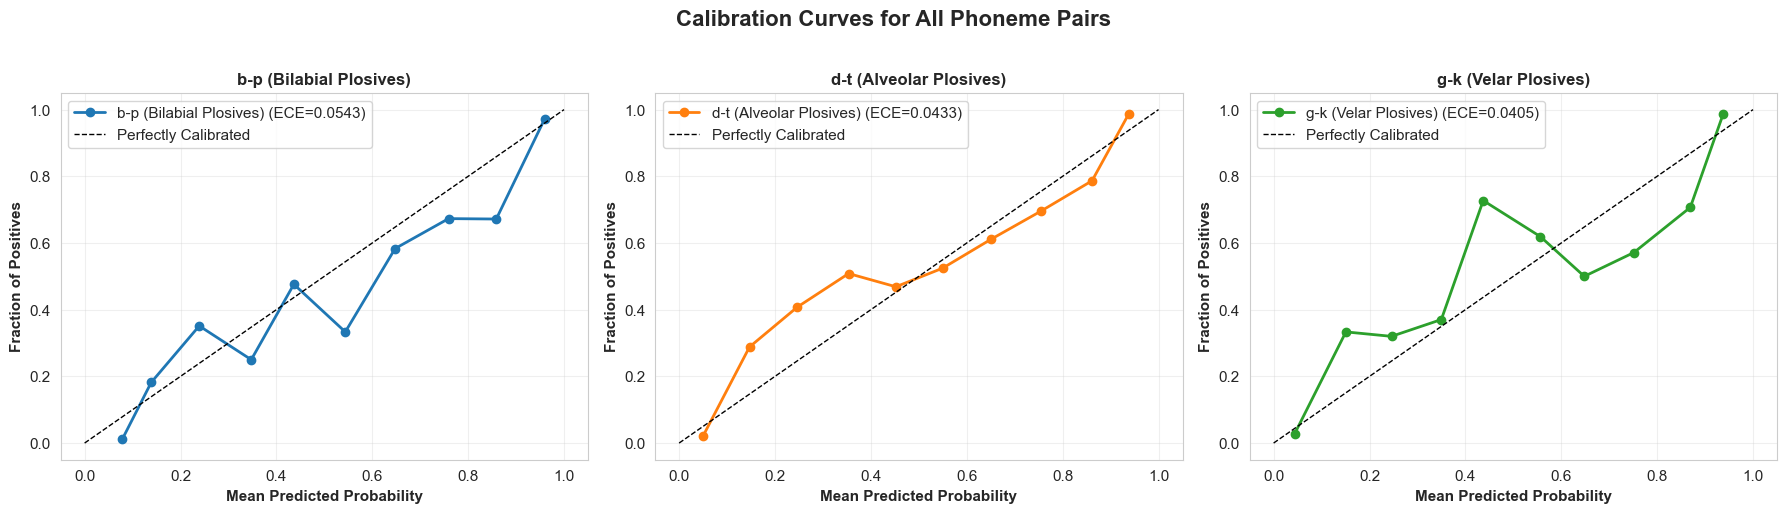

CALIBRATION BIN ANALYSIS

b-p (Bilabial Plosives):
  ECE: 0.0543
  Brier Score: 0.0308

  Bin Details:
  Bin Range       Count      Accuracy     Confidence   Error     
  ------------------------------------------------------------
  [0.00, 0.10]  3737       0.0118       0.0787       0.0669    
  [0.10, 0.20]  77         0.1818       0.1389       0.0429    
  [0.20, 0.30]  37         0.3514       0.2391       0.1123    
  [0.30, 0.40]  16         0.2500       0.3476       0.0976    
  [0.40, 0.50]  21         0.4762       0.4364       0.0398    
  [0.50, 0.60]  18         0.3333       0.5438       0.2104    
  [0.60, 0.70]  36         0.5833       0.6477       0.0644    
  [0.70, 0.80]  52         0.6731       0.7592       0.0861    
  [0.80, 0.90]  64         0.6719       0.8587       0.1868    
  [0.90, 1.00]  1478       0.9716       0.9594       0.0122    

d-t (Alveolar Plosives):
  ECE: 0.0433
  Brier Score: 0.0331

  Bin Details:
  Bin Range       Count      Accuracy     Confiden

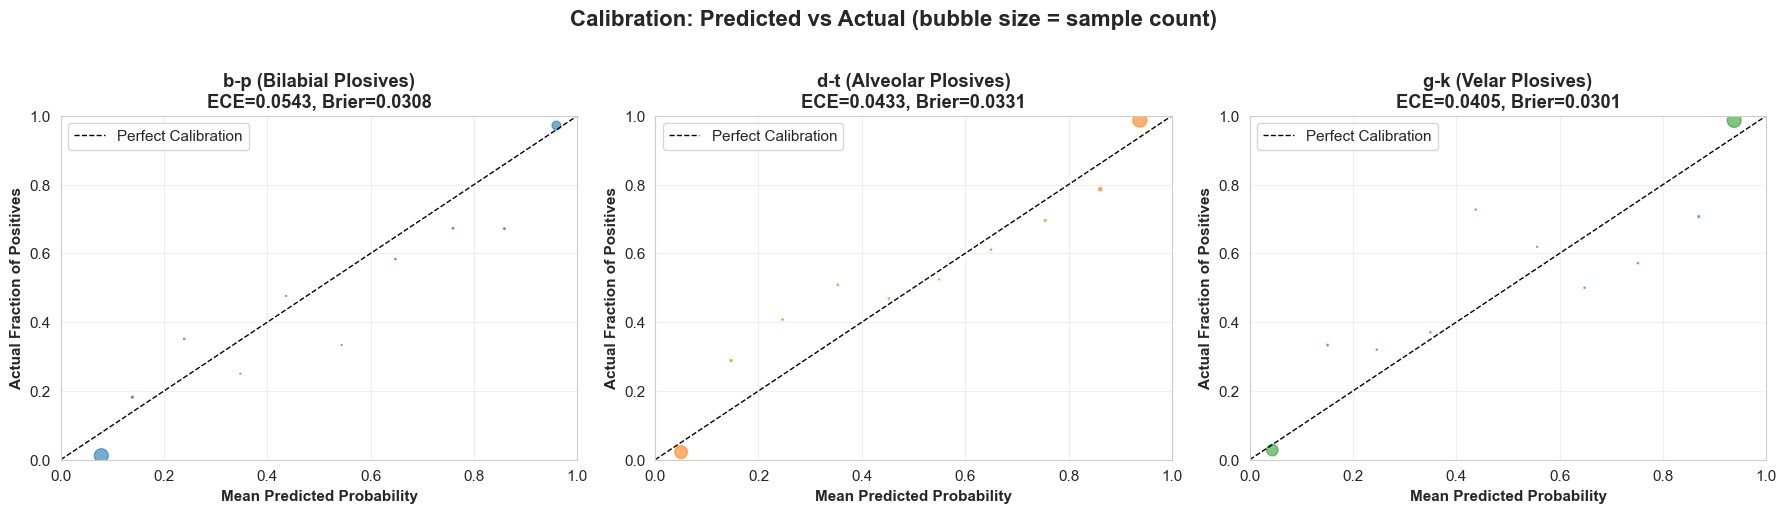


CALIBRATION SUMMARY
                   Pair      ECE  Brier Score Calibration Quality
b-p (Bilabial Plosives) 0.054273     0.030840                Good
d-t (Alveolar Plosives) 0.043292     0.033078           Excellent
   g-k (Velar Plosives) 0.040452     0.030139           Excellent


In [36]:
# Detailed Calibration Analysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LogisticRegression

def plot_calibration_curve(y_true, y_prob, n_bins=10, ax=None, label=None, color=None):
    """Plot calibration curve"""
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_true, y_prob, n_bins=n_bins, strategy='uniform'
    )
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(mean_predicted_value, fraction_of_positives, 
            marker='o', linewidth=2, label=label, color=color)
    ax.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated', linewidth=1)
    ax.set_xlabel('Mean Predicted Probability', fontweight='bold')
    ax.set_ylabel('Fraction of Positives', fontweight='bold')
    ax.set_title('Calibration Curve', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return fraction_of_positives, mean_predicted_value

# Calibration analysis for each pair
calibration_results = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (pair_key, config) in enumerate(PAIRS_CONFIG.items()):
    predictions_df = all_predictions[pair_key]
    y_true = predictions_df['true_class_encoded'].values
    y_prob = predictions_df['prob_class_1'].values
    
    # Calculate calibration metrics
    ece = calculate_ece(y_true, y_prob)
    brier = brier_score_loss(y_true, y_prob)
    
    # Plot calibration curve
    ax = axes[idx]
    plot_calibration_curve(y_true, y_prob, ax=ax, 
                          label=f'{config["name"]} (ECE={ece:.4f})',
                          color=['#1f77b4', '#ff7f0e', '#2ca02c'][idx])
    ax.set_title(f'{config["name"]}', fontweight='bold', fontsize=12)
    
    # Calculate calibration in bins
    n_bins = 10
    bin_boundaries = np.linspace(0, 1, n_bins + 1)
    bin_lowers = bin_boundaries[:-1]
    bin_uppers = bin_boundaries[1:]
    
    bin_stats = []
    for bin_lower, bin_upper in zip(bin_lowers, bin_uppers):
        in_bin = (y_prob > bin_lower) & (y_prob <= bin_upper)
        prop_in_bin = in_bin.mean()
        
        if prop_in_bin > 0:
            accuracy_in_bin = y_true[in_bin].mean()
            avg_confidence_in_bin = y_prob[in_bin].mean()
            count_in_bin = in_bin.sum()
            bin_stats.append({
                'bin_lower': bin_lower,
                'bin_upper': bin_upper,
                'count': count_in_bin,
                'accuracy': accuracy_in_bin,
                'confidence': avg_confidence_in_bin,
                'calibration_error': abs(avg_confidence_in_bin - accuracy_in_bin)
            })
    
    calibration_results.append({
        'Pair': config['name'],
        'ECE': ece,
        'Brier Score': brier,
        'Bin Stats': bin_stats
    })

plt.suptitle('Calibration Curves for All Phoneme Pairs', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Detailed bin analysis
print("="*80)
print("CALIBRATION BIN ANALYSIS")
print("="*80)

for calib_result in calibration_results:
    print(f"\n{calib_result['Pair']}:")
    print(f"  ECE: {calib_result['ECE']:.4f}")
    print(f"  Brier Score: {calib_result['Brier Score']:.4f}")
    print(f"\n  Bin Details:")
    print(f"  {'Bin Range':<15} {'Count':<10} {'Accuracy':<12} {'Confidence':<12} {'Error':<10}")
    print(f"  {'-'*60}")
    for bin_stat in calib_result['Bin Stats']:
        print(f"  [{bin_stat['bin_lower']:.2f}, {bin_stat['bin_upper']:.2f}]  "
              f"{bin_stat['count']:<10} {bin_stat['accuracy']:<12.4f} "
              f"{bin_stat['confidence']:<12.4f} {bin_stat['calibration_error']:<10.4f}")

# Visualize calibration bins
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, calib_result in enumerate(calibration_results):
    ax = axes[idx]
    bin_stats = calib_result['Bin Stats']
    
    bin_centers = [(b['bin_lower'] + b['bin_upper']) / 2 for b in bin_stats]
    accuracies = [b['accuracy'] for b in bin_stats]
    confidences = [b['confidence'] for b in bin_stats]
    counts = [b['count'] for b in bin_stats]
    errors = [b['calibration_error'] for b in bin_stats]
    
    # Normalize counts for visualization
    max_count = max(counts) if counts else 1
    sizes = [c / max_count * 100 for c in counts]
    
    # Plot accuracy vs confidence
    ax.scatter(confidences, accuracies, s=sizes, alpha=0.6, 
              color=['#1f77b4', '#ff7f0e', '#2ca02c'][idx])
    ax.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Perfect Calibration')
    ax.set_xlabel('Mean Predicted Probability', fontweight='bold')
    ax.set_ylabel('Actual Fraction of Positives', fontweight='bold')
    ax.set_title(f"{calib_result['Pair']}\nECE={calib_result['ECE']:.4f}, "
                f"Brier={calib_result['Brier Score']:.4f}", fontweight='bold')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('Calibration: Predicted vs Actual (bubble size = sample count)', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary calibration metrics
print("\n" + "="*80)
print("CALIBRATION SUMMARY")
print("="*80)
calib_summary = pd.DataFrame([
    {
        'Pair': calib_result['Pair'],
        'ECE': calib_result['ECE'],
        'Brier Score': calib_result['Brier Score'],
        'Calibration Quality': 'Excellent' if calib_result['ECE'] < 0.05 else 
                              'Good' if calib_result['ECE'] < 0.1 else 
                              'Fair' if calib_result['ECE'] < 0.15 else 'Poor'
    }
    for calib_result in calibration_results
])
print(calib_summary.to_string(index=False))


## Part 6: Detailed Error Pattern Analysis


ERROR PATTERN ANALYSIS
                   Pair  Total Errors  High Conf Errors  High Conf Errors %  Medium Conf Errors  Medium Conf Errors %  Low Conf Errors  Low Conf Errors %  Low Conf Correct  Low Conf Correct %  High Conf Errors Mean Prob  Low Conf Errors Mean Prob
b-p (Bilabial Plosives)           192                86           44.791667                  65             33.854167               41          21.354167                50            0.903179                    0.931418                   0.600091
d-t (Alveolar Plosives)           798               315           39.473684                 294             36.842105              189          23.684211               222            1.112838                    0.932522                   0.602860
   g-k (Velar Plosives)           203               105           51.724138                  51             25.123153               47          23.152709                49            0.859951                    0.942357                 

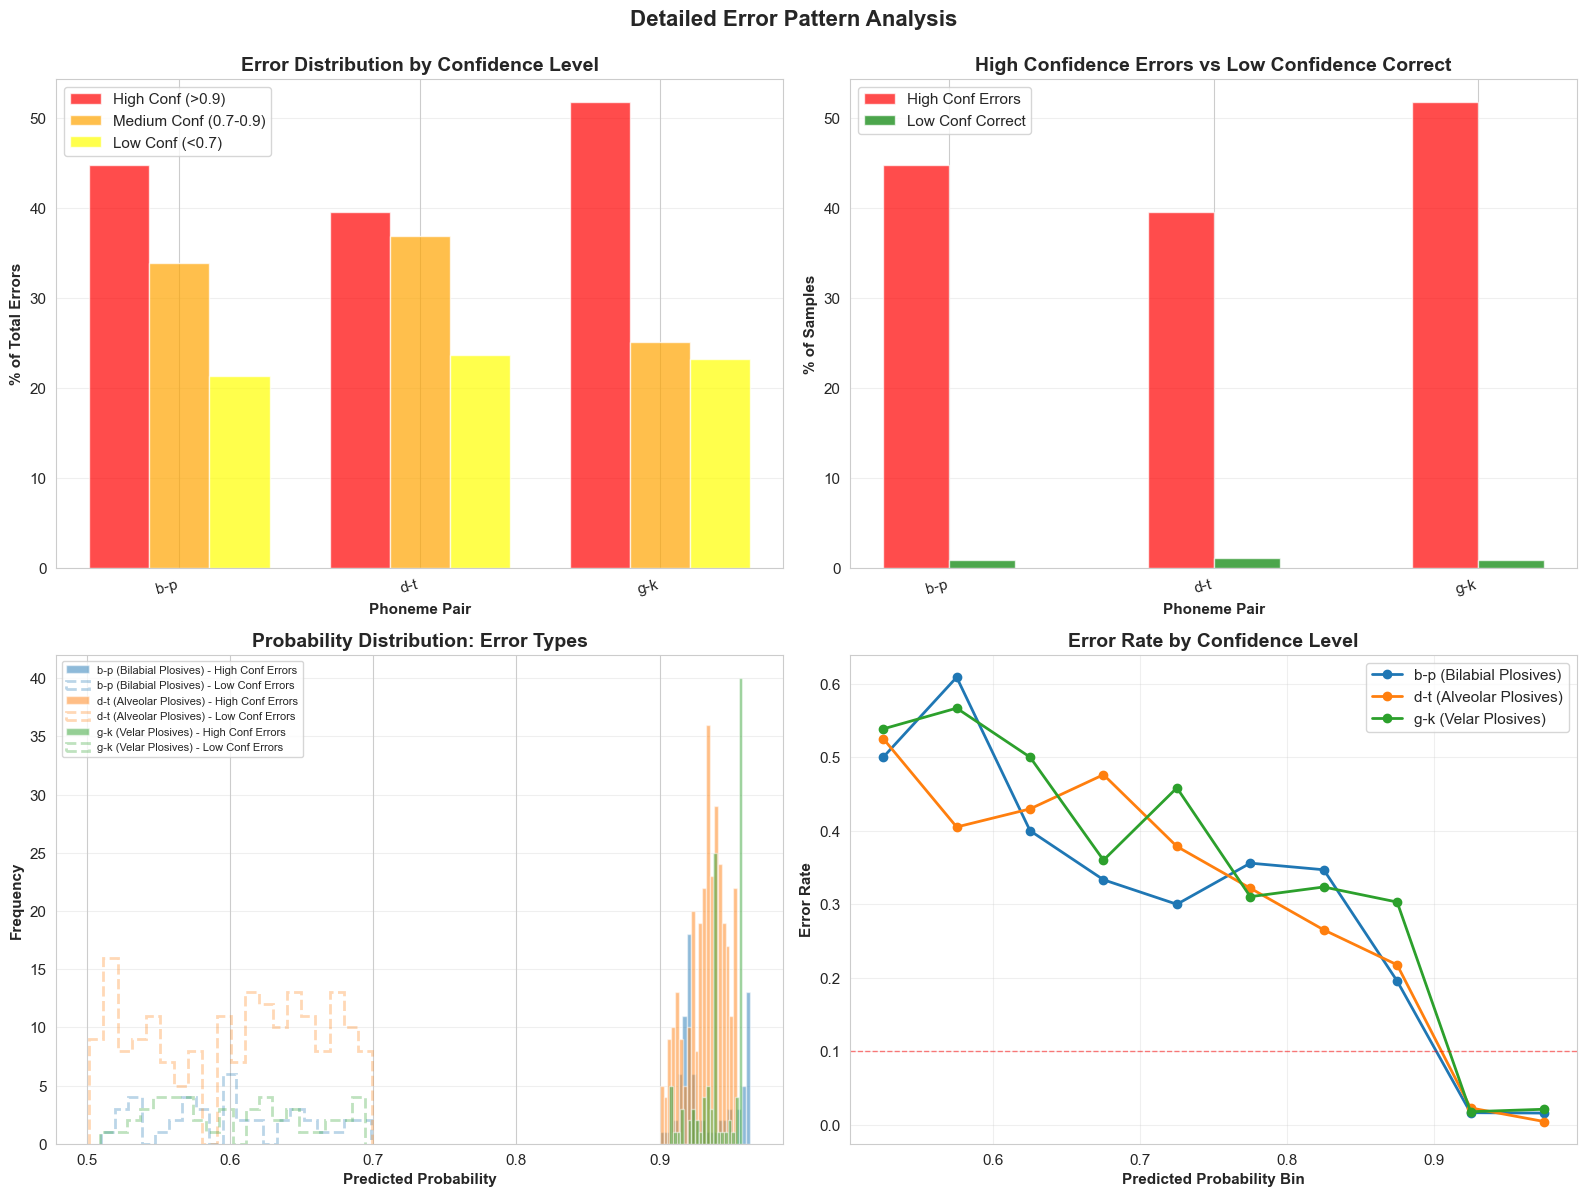


DETAILED ERROR STATISTICS BY PAIR

b-p (Bilabial Plosives):
  Total samples: 5536
  Total errors: 192
  Error rate: 3.47%

  High confidence errors (>0.9):
    Count: 86
    Mean probability: 0.9314
    Min probability: 0.9000
    Max probability: 0.9632

  Low confidence errors (<0.7):
    Count: 41
    Mean probability: 0.6001
    Min probability: 0.5101
    Max probability: 0.6984

  Errors by true class:
    b: 107/3910 (2.74%)
      Mean error probability: 0.8125
    p: 85/1626 (5.23%)
      Mean error probability: 0.8283

d-t (Alveolar Plosives):
  Total samples: 19949
  Total errors: 798
  Error rate: 4.00%

  High confidence errors (>0.9):
    Count: 315
    Mean probability: 0.9325
    Min probability: 0.9000
    Max probability: 0.9542

  Low confidence errors (<0.7):
    Count: 189
    Mean probability: 0.6029
    Min probability: 0.5016
    Max probability: 0.6990

  Errors by true class:
    d: 389/8874 (4.38%)
      Mean error probability: 0.8108
    t: 409/11075 (3.69%)

In [37]:
# Detailed Error Pattern Analysis

error_analysis_results = []

for pair_key, config in PAIRS_CONFIG.items():
    predictions_df = all_predictions[pair_key].copy()
    
    # Categorize errors by confidence level
    predictions_df['error_category'] = 'correct'
    predictions_df.loc[predictions_df['is_correct'] == 0, 'error_category'] = 'error'
    
    # High confidence errors (>0.9)
    high_conf_threshold = 0.9
    low_conf_threshold = 0.7
    
    high_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] > high_conf_threshold)
    ]
    
    medium_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & 
        (predictions_df['max_prob'] > low_conf_threshold) & 
        (predictions_df['max_prob'] <= high_conf_threshold)
    ]
    
    low_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] <= low_conf_threshold)
    ]
    
    # Low confidence correct predictions
    low_conf_correct = predictions_df[
        (predictions_df['is_correct'] == 1) & (predictions_df['max_prob'] < low_conf_threshold)
    ]
    
    # Analyze error patterns
    total_errors = len(predictions_df[predictions_df['is_correct'] == 0])
    
    error_analysis_results.append({
        'Pair': config['name'],
        'Total Errors': total_errors,
        'High Conf Errors': len(high_conf_errors),
        'High Conf Errors %': len(high_conf_errors) / total_errors * 100 if total_errors > 0 else 0,
        'Medium Conf Errors': len(medium_conf_errors),
        'Medium Conf Errors %': len(medium_conf_errors) / total_errors * 100 if total_errors > 0 else 0,
        'Low Conf Errors': len(low_conf_errors),
        'Low Conf Errors %': len(low_conf_errors) / total_errors * 100 if total_errors > 0 else 0,
        'Low Conf Correct': len(low_conf_correct),
        'Low Conf Correct %': len(low_conf_correct) / len(predictions_df) * 100,
        'High Conf Errors Mean Prob': high_conf_errors['max_prob'].mean() if len(high_conf_errors) > 0 else 0,
        'Low Conf Errors Mean Prob': low_conf_errors['max_prob'].mean() if len(low_conf_errors) > 0 else 0
    })

error_analysis_df = pd.DataFrame(error_analysis_results)

print("="*80)
print("ERROR PATTERN ANALYSIS")
print("="*80)
print(error_analysis_df.to_string(index=False))

# Visualize error patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Error distribution by confidence level
ax1 = axes[0, 0]
x = np.arange(len(error_analysis_df))
width = 0.25
ax1.bar(x - width, error_analysis_df['High Conf Errors %'], width, 
        label='High Conf (>0.9)', color='red', alpha=0.7)
ax1.bar(x, error_analysis_df['Medium Conf Errors %'], width,
        label='Medium Conf (0.7-0.9)', color='orange', alpha=0.7)
ax1.bar(x + width, error_analysis_df['Low Conf Errors %'], width,
        label='Low Conf (<0.7)', color='yellow', alpha=0.7)
ax1.set_xlabel('Phoneme Pair', fontweight='bold')
ax1.set_ylabel('% of Total Errors', fontweight='bold')
ax1.set_title('Error Distribution by Confidence Level', fontweight='bold', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels([name.split('(')[0].strip() for name in error_analysis_df['Pair']], 
                     rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. High confidence errors vs low confidence correct
ax2 = axes[0, 1]
x = np.arange(len(error_analysis_df))
ax2.bar(x - width/2, error_analysis_df['High Conf Errors %'], width,
        label='High Conf Errors', color='red', alpha=0.7)
ax2.bar(x + width/2, error_analysis_df['Low Conf Correct %'], width,
        label='Low Conf Correct', color='green', alpha=0.7)
ax2.set_xlabel('Phoneme Pair', fontweight='bold')
ax2.set_ylabel('% of Samples', fontweight='bold')
ax2.set_title('High Confidence Errors vs Low Confidence Correct', fontweight='bold', fontsize=14)
ax2.set_xticks(x)
ax2.set_xticklabels([name.split('(')[0].strip() for name in error_analysis_df['Pair']], 
                     rotation=15, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. Probability distributions for different error types
ax3 = axes[1, 0]
for idx, (pair_key, config) in enumerate(PAIRS_CONFIG.items()):
    predictions_df = all_predictions[pair_key]
    
    high_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] > 0.9)
    ]['max_prob'].values
    
    low_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] <= 0.7)
    ]['max_prob'].values
    
    if len(high_conf_errors) > 0:
        ax3.hist(high_conf_errors, bins=20, alpha=0.5, 
                label=f'{config["name"]} - High Conf Errors', 
                color=['#1f77b4', '#ff7f0e', '#2ca02c'][idx])
    if len(low_conf_errors) > 0:
        ax3.hist(low_conf_errors, bins=20, alpha=0.3, 
                label=f'{config["name"]} - Low Conf Errors',
                color=['#1f77b4', '#ff7f0e', '#2ca02c'][idx], 
                linestyle='--', histtype='step', linewidth=2)

ax3.set_xlabel('Predicted Probability', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Probability Distribution: Error Types', fontweight='bold', fontsize=14)
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Error rate by predicted probability bins
ax4 = axes[1, 1]
for idx, (pair_key, config) in enumerate(PAIRS_CONFIG.items()):
    predictions_df = all_predictions[pair_key]
    
    # Create probability bins
    bins = np.linspace(0.5, 1.0, 11)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    error_rates = []
    
    for i in range(len(bins) - 1):
        in_bin = (predictions_df['max_prob'] > bins[i]) & (predictions_df['max_prob'] <= bins[i+1])
        if in_bin.sum() > 0:
            error_rate = (predictions_df.loc[in_bin, 'is_correct'] == 0).sum() / in_bin.sum()
            error_rates.append(error_rate)
        else:
            error_rates.append(0)
    
    ax4.plot(bin_centers, error_rates, marker='o', linewidth=2, 
            label=config['name'], color=['#1f77b4', '#ff7f0e', '#2ca02c'][idx])

ax4.set_xlabel('Predicted Probability Bin', fontweight='bold')
ax4.set_ylabel('Error Rate', fontweight='bold')
ax4.set_title('Error Rate by Confidence Level', fontweight='bold', fontsize=14)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axhline(0.1, color='red', linestyle='--', linewidth=1, alpha=0.5, label='10% threshold')

plt.suptitle('Detailed Error Pattern Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Detailed statistics for each pair
print("\n" + "="*80)
print("DETAILED ERROR STATISTICS BY PAIR")
print("="*80)

for pair_key, config in PAIRS_CONFIG.items():
    predictions_df = all_predictions[pair_key]
    
    print(f"\n{config['name']}:")
    print(f"  Total samples: {len(predictions_df)}")
    print(f"  Total errors: {(predictions_df['is_correct'] == 0).sum()}")
    print(f"  Error rate: {(predictions_df['is_correct'] == 0).sum() / len(predictions_df) * 100:.2f}%")
    
    # Errors by confidence
    high_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] > 0.9)
    ]
    low_conf_errors = predictions_df[
        (predictions_df['is_correct'] == 0) & (predictions_df['max_prob'] <= 0.7)
    ]
    
    print(f"\n  High confidence errors (>0.9):")
    print(f"    Count: {len(high_conf_errors)}")
    if len(high_conf_errors) > 0:
        print(f"    Mean probability: {high_conf_errors['max_prob'].mean():.4f}")
        print(f"    Min probability: {high_conf_errors['max_prob'].min():.4f}")
        print(f"    Max probability: {high_conf_errors['max_prob'].max():.4f}")
    
    print(f"\n  Low confidence errors (<0.7):")
    print(f"    Count: {len(low_conf_errors)}")
    if len(low_conf_errors) > 0:
        print(f"    Mean probability: {low_conf_errors['max_prob'].mean():.4f}")
        print(f"    Min probability: {low_conf_errors['max_prob'].min():.4f}")
        print(f"    Max probability: {low_conf_errors['max_prob'].max():.4f}")
    
    # Errors by class
    print(f"\n  Errors by true class:")
    for cls in [config['class_0'], config['class_1']]:
        cls_df = predictions_df[predictions_df['true_class'] == cls]
        cls_errors = cls_df[cls_df['is_correct'] == 0]
        print(f"    {cls}: {len(cls_errors)}/{len(cls_df)} ({len(cls_errors)/len(cls_df)*100:.2f}%)")
        if len(cls_errors) > 0:
            print(f"      Mean error probability: {cls_errors['max_prob'].mean():.4f}")


## Part 7: Deep Feature Analysis for Error Cases


STATISTICAL FEATURE ANALYSIS FOR ERROR CASES

b-p (Bilabial Plosives):

Top 20 Features with Largest Effect Sizes:
                 feature  correct_mean  incorrect_mean   mean_diff  cohens_d     t_pvalue     u_pvalue
     delta2_mfcc_mean_12      0.069999       -0.480551    0.550550  0.525743 9.379879e-13 7.113979e-11
        spectral_rolloff   2221.206492     2679.966752 -458.760260  0.458636 4.619574e-10 1.835080e-10
      delta2_mfcc_mean_5     -0.506128       -1.329850    0.823722  0.434792 3.455685e-09 6.445381e-08
      spectral_bandwidth   1283.939134     1390.586993 -106.647859  0.434101 3.650539e-09 4.803771e-10
       spectral_flatness      0.183648        0.217335   -0.033688  0.430218 5.019051e-09 1.202405e-08
      delta2_mfcc_mean_8      0.321727       -0.292219    0.613946  0.418991 1.237123e-08 4.079864e-09
                zcr_mean      0.080832        0.105424   -0.024592  0.411653 2.207050e-08 5.395781e-10
              energy_zcr      0.080832        0.105424   -0.0

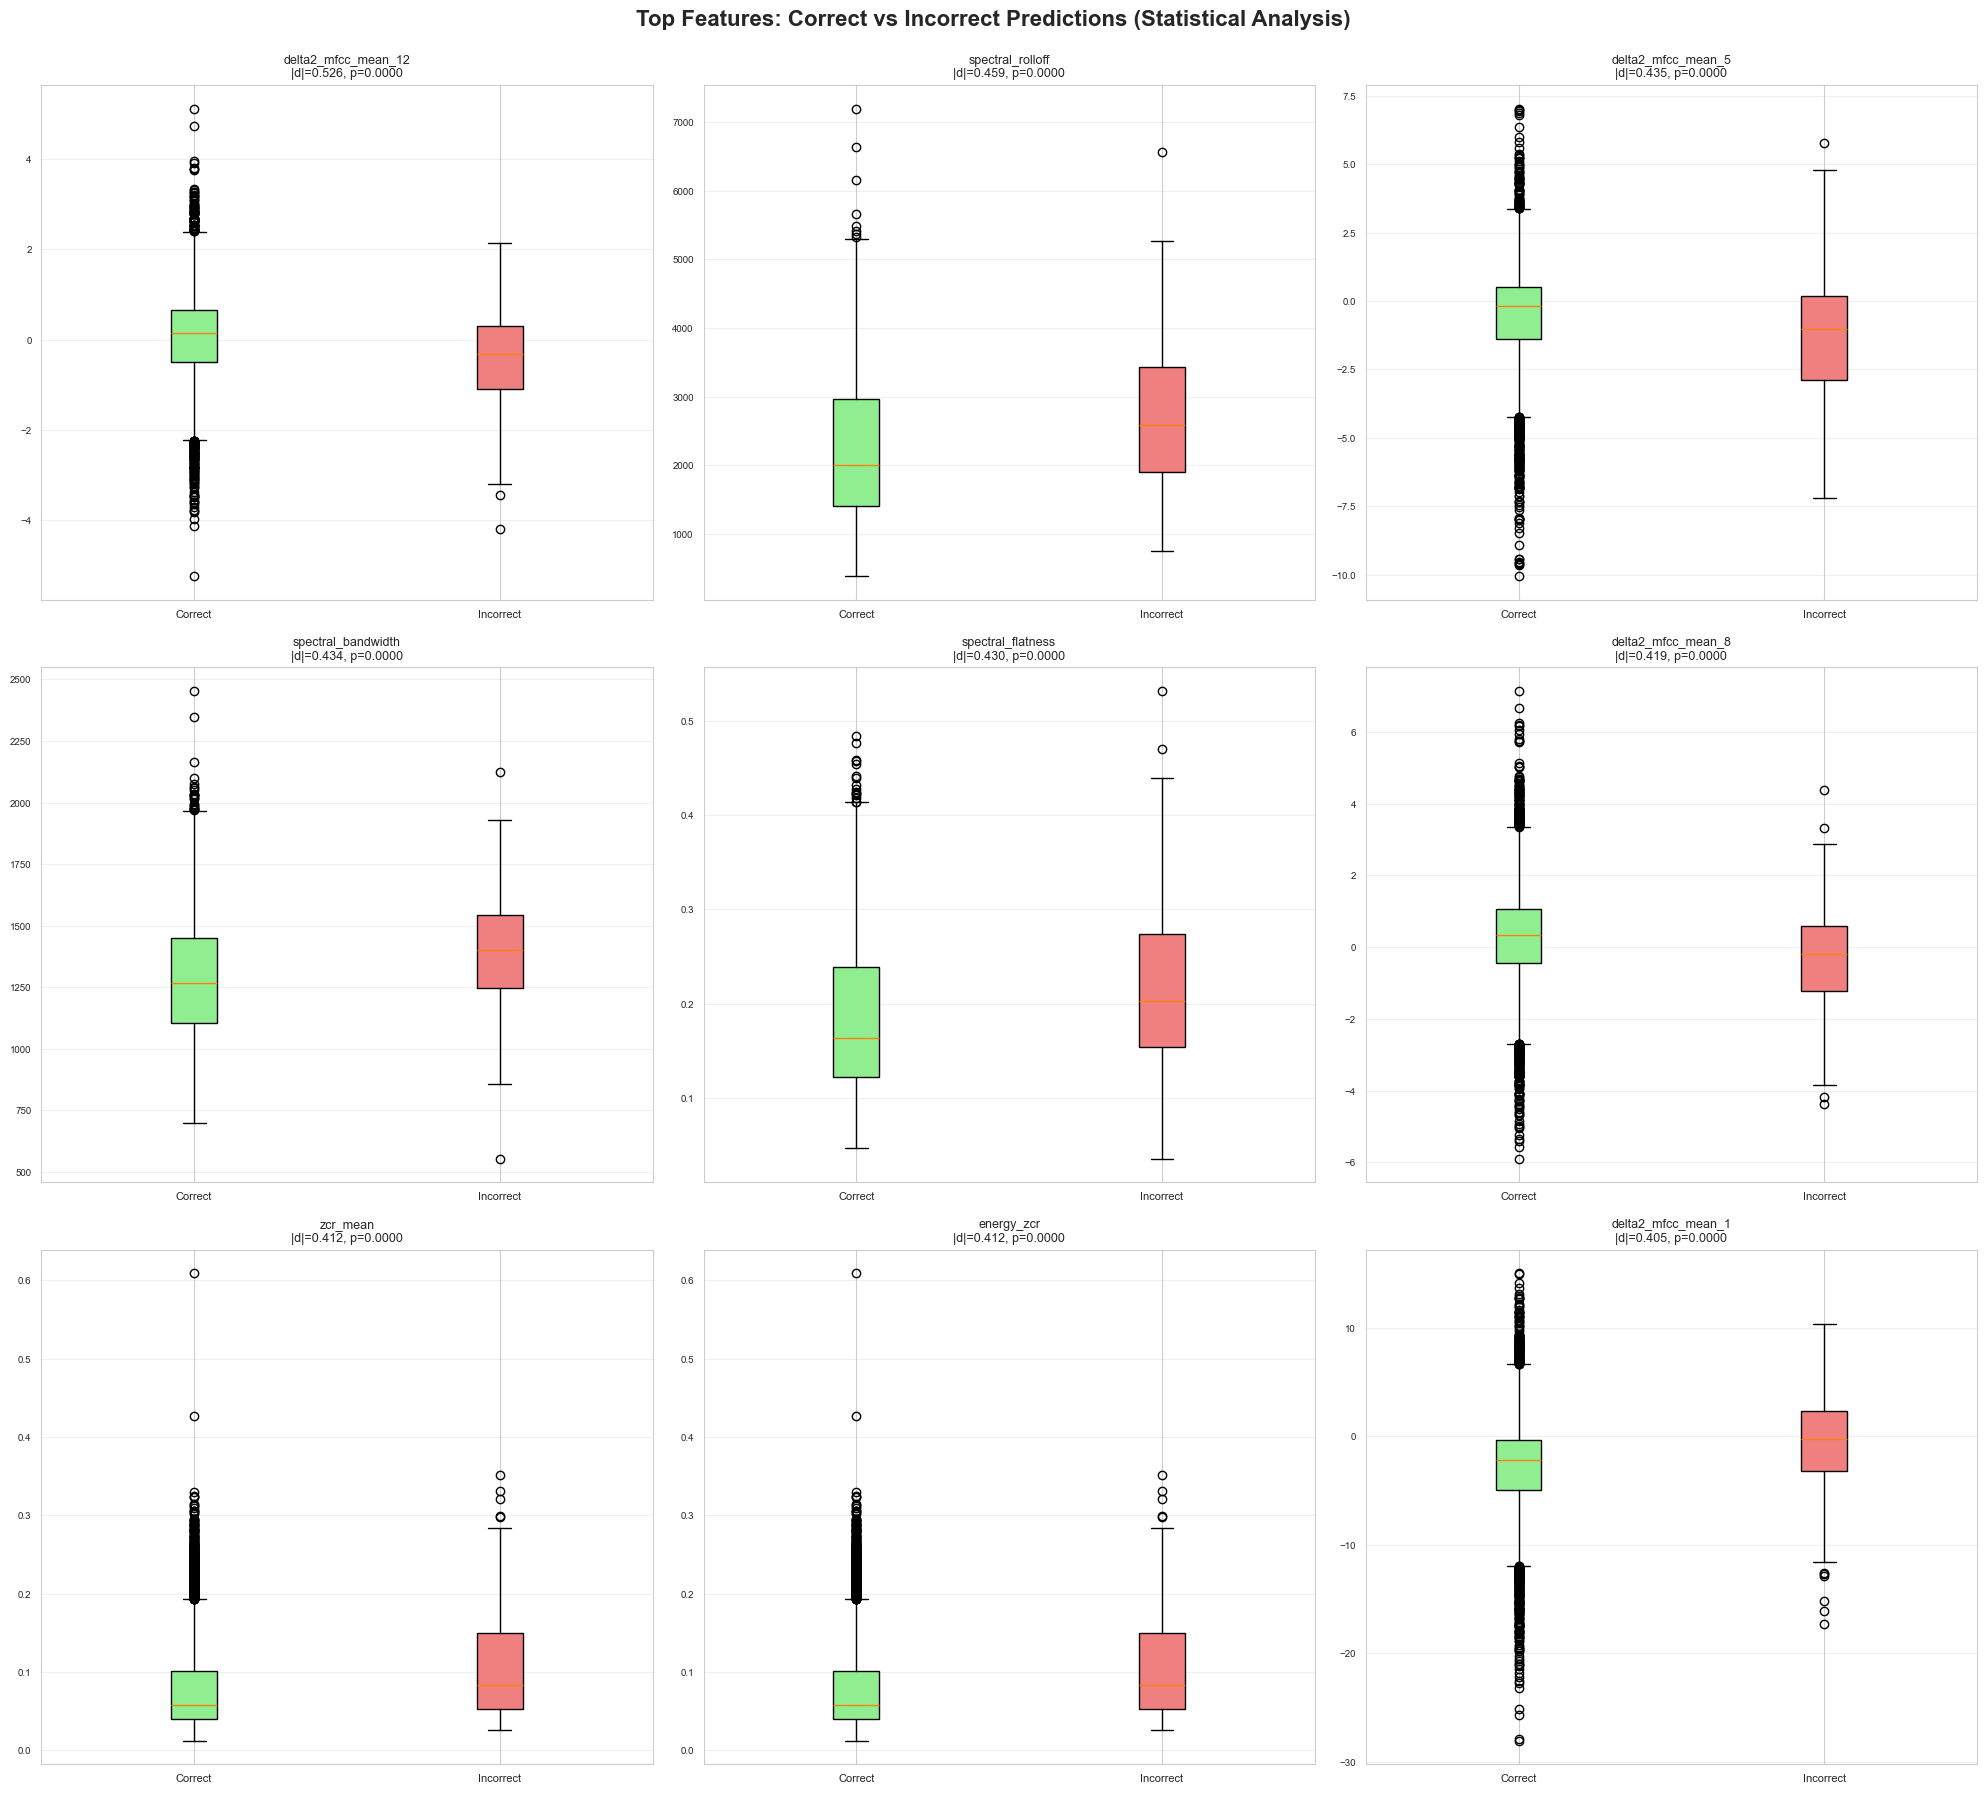


MOST PROBLEMATIC FEATURES ACROSS ALL PAIRS

Top 15 Features with Largest Effect Sizes (across all pairs):
                   Pair                  feature  abs_cohens_d     t_pvalue
b-p (Bilabial Plosives)      delta2_mfcc_mean_12      0.525743 9.379879e-13
b-p (Bilabial Plosives)         spectral_rolloff      0.458636 4.619574e-10
   g-k (Velar Plosives)              mfcc_mean_4      0.438823 8.882062e-10
b-p (Bilabial Plosives)       delta2_mfcc_mean_5      0.434792 3.455685e-09
b-p (Bilabial Plosives)       spectral_bandwidth      0.434101 3.650539e-09
b-p (Bilabial Plosives)        spectral_flatness      0.430218 5.019051e-09
   g-k (Velar Plosives)       delta2_mfcc_mean_1      0.402890 1.822424e-08
   g-k (Velar Plosives)       delta2_mfcc_mean_5      0.398227 2.653561e-08
   g-k (Velar Plosives) spectral_contrast_mean_3      0.395803 3.216572e-08
   g-k (Velar Plosives)      delta2_mfcc_mean_12      0.348634 1.105845e-06
d-t (Alveolar Plosives)       delta2_mfcc_mean_0      0.2

In [38]:
# Deep Feature Analysis with Statistical Tests

feature_analysis_deep = []

for pair_key, config in PAIRS_CONFIG.items():
    try:
        # Load features
        features_df = pd.read_parquet(config['features_path'])
        predictions_df = all_predictions[pair_key]
        
        # Merge
        merged_df = predictions_df.merge(
            features_df[['phoneme_id'] + [col for col in features_df.columns 
                                         if col not in ['phoneme_id', 'class', 'phoneme', 
                                                       'utterance_id', 'duration_ms']]],
            on='phoneme_id',
            how='left'
        )
        
        # Separate correct and incorrect
        correct_df = merged_df[merged_df['is_correct'] == 1].copy()
        incorrect_df = merged_df[merged_df['is_correct'] == 0].copy()
        
        # Get numeric features
        feature_cols = [col for col in merged_df.columns 
                       if col not in ['phoneme_id', 'utterance_id', 'phoneme', 'true_class', 
                                     'predicted_class', 'true_class_encoded', 'predicted_class_encoded',
                                     'is_correct', 'confidence', 'max_prob', 'prob_class_0', 'prob_class_1',
                                     'duration_ms', 'class']
                       and pd.api.types.is_numeric_dtype(merged_df[col])]
        
        # Statistical analysis
        feature_stats = []
        for col in feature_cols:
            correct_vals = correct_df[col].dropna().values
            incorrect_vals = incorrect_df[col].dropna().values
            
            if len(correct_vals) > 10 and len(incorrect_vals) > 10:
                # T-test
                try:
                    t_stat, t_pvalue = stats.ttest_ind(correct_vals, incorrect_vals)
                except:
                    t_stat, t_pvalue = np.nan, np.nan
                
                # Mann-Whitney U test (non-parametric)
                try:
                    u_stat, u_pvalue = stats.mannwhitneyu(correct_vals, incorrect_vals, 
                                                         alternative='two-sided')
                except:
                    u_stat, u_pvalue = np.nan, np.nan
                
                # Effect size (Cohen's d)
                try:
                    pooled_std = np.sqrt(((len(correct_vals) - 1) * correct_vals.std()**2 + 
                                          (len(incorrect_vals) - 1) * incorrect_vals.std()**2) / 
                                         (len(correct_vals) + len(incorrect_vals) - 2))
                    cohens_d = (correct_vals.mean() - incorrect_vals.mean()) / pooled_std if pooled_std > 0 else 0
                except:
                    cohens_d = np.nan
                
                feature_stats.append({
                    'feature': col,
                    'correct_mean': correct_vals.mean(),
                    'incorrect_mean': incorrect_vals.mean(),
                    'mean_diff': correct_vals.mean() - incorrect_vals.mean(),
                    'correct_std': correct_vals.std(),
                    'incorrect_std': incorrect_vals.std(),
                    't_statistic': t_stat,
                    't_pvalue': t_pvalue,
                    'u_statistic': u_stat,
                    'u_pvalue': u_pvalue,
                    'cohens_d': cohens_d,
                    'significant_t': t_pvalue < 0.05 if not np.isnan(t_pvalue) else False,
                    'significant_u': u_pvalue < 0.05 if not np.isnan(u_pvalue) else False
                })
        
        feature_stats_df = pd.DataFrame(feature_stats)
        
        # Sort by significance and effect size
        feature_stats_df['abs_cohens_d'] = feature_stats_df['cohens_d'].abs()
        feature_stats_df = feature_stats_df.sort_values('abs_cohens_d', ascending=False)
        
        feature_analysis_deep.append({
            'Pair': config['name'],
            'Feature Stats': feature_stats_df,
            'Top Features': feature_stats_df.head(20)
        })
        
    except Exception as e:
        print(f"Warning: Could not analyze features for {pair_key}: {e}")
        feature_analysis_deep.append({
            'Pair': config['name'],
            'Feature Stats': None,
            'Top Features': None
        })

# Display top features for each pair
print("="*80)
print("STATISTICAL FEATURE ANALYSIS FOR ERROR CASES")
print("="*80)

for analysis in feature_analysis_deep:
    if analysis['Top Features'] is not None and len(analysis['Top Features']) > 0:
        print(f"\n{analysis['Pair']}:")
        print(f"\nTop 20 Features with Largest Effect Sizes:")
        top_features = analysis['Top Features'][['feature', 'correct_mean', 'incorrect_mean', 
                                                  'mean_diff', 'cohens_d', 't_pvalue', 'u_pvalue']].copy()
        top_features['cohens_d'] = top_features['cohens_d'].abs()
        print(top_features.to_string(index=False))
        
        # Count significant features
        sig_t = analysis['Feature Stats']['significant_t'].sum()
        sig_u = analysis['Feature Stats']['significant_u'].sum()
        print(f"\n  Statistically significant features (p < 0.05):")
        print(f"    T-test: {sig_t}/{len(analysis['Feature Stats'])}")
        print(f"    Mann-Whitney U: {sig_u}/{len(analysis['Feature Stats'])}")

# Visualize top features
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

plot_idx = 0
for idx, analysis in enumerate(feature_analysis_deep):
    if analysis['Top Features'] is not None and len(analysis['Top Features']) > 0:
        top_10 = analysis['Top Features'].head(10)
        
        for feat_idx, row in top_10.iterrows():
            if plot_idx >= 9:
                break
            
            ax = axes[plot_idx]
            
            # Get data for this feature
            pair_key = list(PAIRS_CONFIG.keys())[idx]
            features_df = pd.read_parquet(PAIRS_CONFIG[pair_key]['features_path'])
            predictions_df = all_predictions[pair_key]
            merged_df = predictions_df.merge(
                features_df[['phoneme_id', row['feature']]],
                on='phoneme_id',
                how='left'
            )
            
            correct_vals = merged_df[merged_df['is_correct'] == 1][row['feature']].dropna().values
            incorrect_vals = merged_df[merged_df['is_correct'] == 0][row['feature']].dropna().values
            
            if len(correct_vals) > 0 and len(incorrect_vals) > 0:
                # Box plot
                bp = ax.boxplot([correct_vals, incorrect_vals], 
                               labels=['Correct', 'Incorrect'], 
                               patch_artist=True)
                bp['boxes'][0].set_facecolor('lightgreen')
                bp['boxes'][1].set_facecolor('lightcoral')
                
                feat_name = row['feature'][:40] + '...' if len(row['feature']) > 40 else row['feature']
                ax.set_title(f"{feat_name}\n|d|={row['abs_cohens_d']:.3f}, p={row['t_pvalue']:.4f}", 
                           fontsize=9)
                ax.tick_params(axis='x', labelsize=8)
                ax.tick_params(axis='y', labelsize=7)
                ax.grid(True, alpha=0.3, axis='y')
            
            plot_idx += 1
            if plot_idx >= 9:
                break

# Remove unused subplots
for i in range(plot_idx, 9):
    fig.delaxes(axes[i])

plt.suptitle('Top Features: Correct vs Incorrect Predictions (Statistical Analysis)', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Summary of most problematic features across all pairs
print("\n" + "="*80)
print("MOST PROBLEMATIC FEATURES ACROSS ALL PAIRS")
print("="*80)

all_top_features = []
for analysis in feature_analysis_deep:
    if analysis['Top Features'] is not None:
        top_5 = analysis['Top Features'].head(5).copy()
        top_5['Pair'] = analysis['Pair']
        all_top_features.append(top_5[['Pair', 'feature', 'abs_cohens_d', 't_pvalue']])

if all_top_features:
    combined_top = pd.concat(all_top_features, ignore_index=True)
    combined_top = combined_top.sort_values('abs_cohens_d', ascending=False)
    
    print("\nTop 15 Features with Largest Effect Sizes (across all pairs):")
    print(combined_top.head(15).to_string(index=False))
    
    # Find common problematic features
    feature_counts = combined_top['feature'].value_counts()
    if len(feature_counts) > 0:
        print(f"\nFeatures appearing in top 5 for multiple pairs:")
        common_features = feature_counts[feature_counts > 1]
        if len(common_features) > 0:
            for feat, count in common_features.items():
                print(f"  {feat}: appears in {count} pairs")
        else:
            print("  No features appear in top 5 for multiple pairs")


## Part 8: Comparative Analysis Across Phoneme Pairs


COMPARATIVE ANALYSIS ACROSS PHONEME PAIRS

1. PERFORMANCE METRICS COMPARISON
--------------------------------------------------------------------------------
                   Pair  Accuracy  F1-Score  Precision   Recall  ROC-AUC  Error Rate
b-p (Bilabial Plosives)  0.965318  0.965386   0.965489 0.965318 0.990336    0.034682
   g-k (Velar Plosives)  0.964373  0.964393   0.964425 0.964373 0.984579    0.035627
d-t (Alveolar Plosives)  0.959998  0.960002   0.960009 0.959998 0.991526    0.040002

  Best performing: b-p (Bilabial Plosives) (Accuracy: 0.9653)
  Worst performing: d-t (Alveolar Plosives) (Accuracy: 0.9600)
  Performance gap: 0.53%

2. CALIBRATION COMPARISON
--------------------------------------------------------------------------------
                   Pair      ECE  Brier Score Calibration Quality
   g-k (Velar Plosives) 0.040452     0.030139           Excellent
d-t (Alveolar Plosives) 0.043292     0.033078           Excellent
b-p (Bilabial Plosives) 0.054273     0.030840

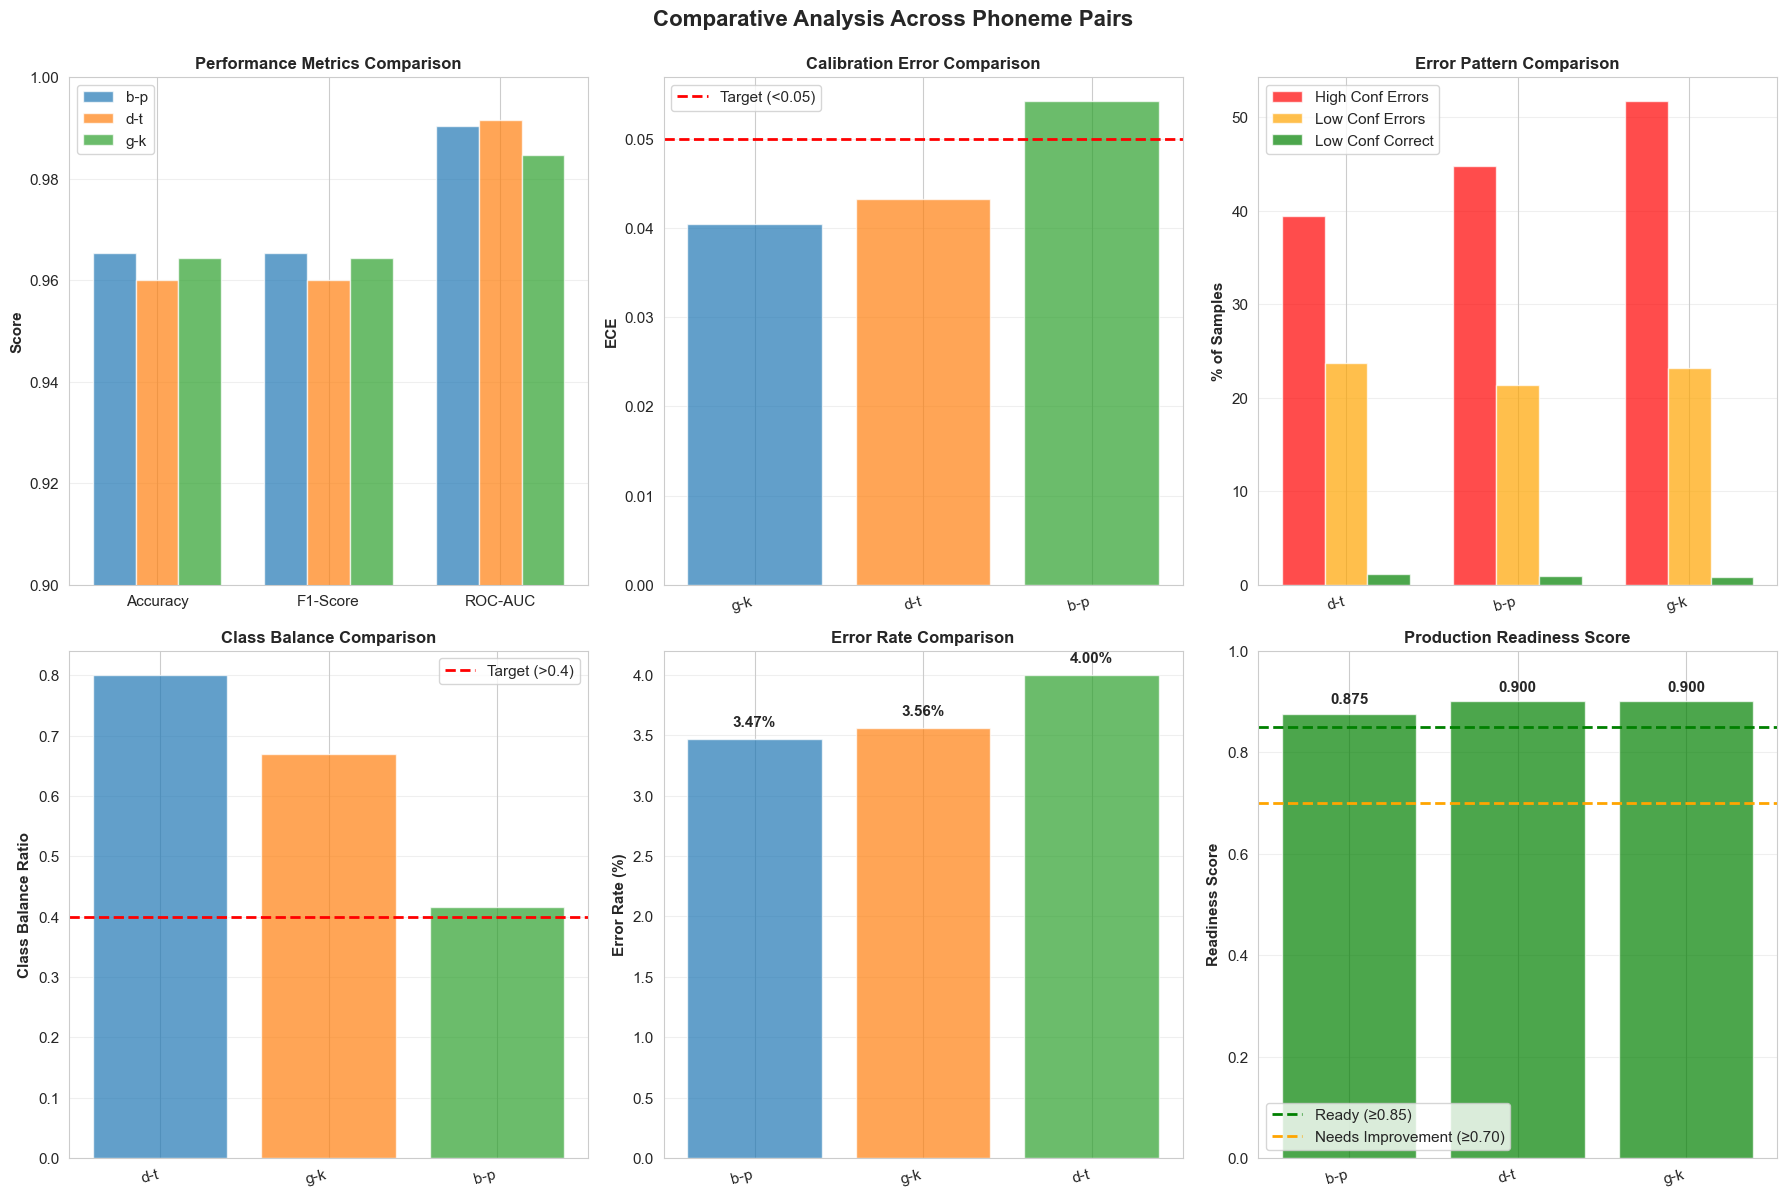


SUMMARY OF COMPARATIVE ANALYSIS

• Performance range: 0.9600 - 0.9653
• Calibration range (ECE): 0.0405 - 0.0543
• High confidence errors range: 39.47% - 51.72%
• Class balance range: 0.4159 - 0.8013

• Common issues found: 1


In [39]:
# Comparative Analysis: Identifying Common Patterns and Differences

print("="*80)
print("COMPARATIVE ANALYSIS ACROSS PHONEME PAIRS")
print("="*80)

# 1. Performance comparison
print("\n1. PERFORMANCE METRICS COMPARISON")
print("-" * 80)
perf_comparison = comparison_df.copy()
perf_comparison['Error Rate'] = 1 - perf_comparison['Accuracy']
perf_comparison = perf_comparison.sort_values('Accuracy', ascending=False)
print(perf_comparison.to_string(index=False))

# Identify best and worst performing pairs
best_pair = perf_comparison.iloc[0]['Pair']
worst_pair = perf_comparison.iloc[-1]['Pair']
print(f"\n  Best performing: {best_pair} (Accuracy: {perf_comparison.iloc[0]['Accuracy']:.4f})")
print(f"  Worst performing: {worst_pair} (Accuracy: {perf_comparison.iloc[-1]['Accuracy']:.4f})")
print(f"  Performance gap: {(perf_comparison.iloc[0]['Accuracy'] - perf_comparison.iloc[-1]['Accuracy'])*100:.2f}%")

# 2. Calibration comparison
print("\n2. CALIBRATION COMPARISON")
print("-" * 80)
calib_comparison = calib_summary.copy()
calib_comparison = calib_comparison.sort_values('ECE', ascending=True)
print(calib_comparison.to_string(index=False))

best_calib = calib_comparison.iloc[0]['Pair']
worst_calib = calib_comparison.iloc[-1]['Pair']
print(f"\n  Best calibrated: {best_calib} (ECE: {calib_comparison.iloc[0]['ECE']:.4f})")
print(f"  Worst calibrated: {worst_calib} (ECE: {calib_comparison.iloc[-1]['ECE']:.4f})")

# 3. Error pattern comparison
print("\n3. ERROR PATTERN COMPARISON")
print("-" * 80)
error_comparison = error_analysis_df[['Pair', 'Total Errors', 'High Conf Errors %', 
                                      'Low Conf Errors %', 'Low Conf Correct %']].copy()
error_comparison = error_comparison.sort_values('High Conf Errors %', ascending=True)
print(error_comparison.to_string(index=False))

# 4. Class balance comparison
print("\n4. CLASS BALANCE COMPARISON")
print("-" * 80)
class_balance_comp = readiness_df[['Pair', 'Class Balance', 'Max Class Error Diff']].copy()
class_balance_comp = class_balance_comp.sort_values('Class Balance', ascending=False)
print(class_balance_comp.to_string(index=False))

# 5. Common issues across all pairs
print("\n5. COMMON ISSUES ACROSS ALL PAIRS")
print("-" * 80)

common_issues = []

# Check if all pairs have high confidence errors
if all(error_analysis_df['High Conf Errors %'] > 5):
    common_issues.append("• All pairs have >5% high confidence errors (calibration issue)")

# Check if all pairs have calibration problems
if all(calib_summary['ECE'] > 0.05):
    common_issues.append("• All pairs have ECE > 0.05 (calibration needs improvement)")

# Check class balance
if any(class_balance_comp['Class Balance'] < 0.4):
    imbalanced = class_balance_comp[class_balance_comp['Class Balance'] < 0.4]
    common_issues.append(f"• {len(imbalanced)} pair(s) have class imbalance (ratio < 0.4)")

# Check error rate consistency
error_rates = [1 - row['Accuracy'] for _, row in perf_comparison.iterrows()]
if max(error_rates) - min(error_rates) > 0.01:
    common_issues.append("• Significant variation in error rates across pairs")

if common_issues:
    for issue in common_issues:
        print(issue)
else:
    print("  No major common issues identified")

# 6. Unique characteristics of each pair
print("\n6. UNIQUE CHARACTERISTICS BY PAIR")
print("-" * 80)

for pair_key, config in PAIRS_CONFIG.items():
    pair_name = config['name']
    print(f"\n{pair_name}:")
    
    # Get metrics for this pair
    perf_row = perf_comparison[perf_comparison['Pair'] == pair_name].iloc[0]
    calib_row = calib_comparison[calib_comparison['Pair'] == pair_name].iloc[0]
    error_row = error_analysis_df[error_analysis_df['Pair'] == pair_name].iloc[0]
    balance_row = class_balance_comp[class_balance_comp['Pair'] == pair_name].iloc[0]
    
    characteristics = []
    
    # Performance
    if perf_row['Accuracy'] == perf_comparison['Accuracy'].max():
        characteristics.append("Highest accuracy")
    elif perf_row['Accuracy'] == perf_comparison['Accuracy'].min():
        characteristics.append("Lowest accuracy")
    
    # Calibration
    if calib_row['ECE'] == calib_comparison['ECE'].min():
        characteristics.append("Best calibration")
    elif calib_row['ECE'] == calib_comparison['ECE'].max():
        characteristics.append("Worst calibration")
    
    # Error patterns
    if error_row['High Conf Errors %'] == error_analysis_df['High Conf Errors %'].max():
        characteristics.append("Most high-confidence errors")
    if error_row['Low Conf Errors %'] == error_analysis_df['Low Conf Errors %'].max():
        characteristics.append("Most low-confidence errors")
    
    # Class balance
    if balance_row['Class Balance'] == class_balance_comp['Class Balance'].min():
        characteristics.append("Most imbalanced classes")
    
    if characteristics:
        print(f"  {'; '.join(characteristics)}")
    else:
        print("  No standout characteristics")

# Visualize comparative analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Performance metrics radar chart (simplified as bar chart)
ax1 = axes[0, 0]
metrics_to_compare = ['Accuracy', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics_to_compare))
width = 0.25
for idx, (pair_key, config) in enumerate(PAIRS_CONFIG.items()):
    row = perf_comparison[perf_comparison['Pair'] == config['name']].iloc[0]
    values = [row['Accuracy'], row['F1-Score'], row['ROC-AUC']]
    ax1.bar(x + idx*width, values, width, label=config['name'].split('(')[0].strip(),
           color=['#1f77b4', '#ff7f0e', '#2ca02c'][idx], alpha=0.7)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Performance Metrics Comparison', fontweight='bold', fontsize=12)
ax1.set_xticks(x + width)
ax1.set_xticklabels(metrics_to_compare)
ax1.legend()
ax1.set_ylim([0.9, 1.0])
ax1.grid(True, alpha=0.3, axis='y')

# 2. Calibration comparison
ax2 = axes[0, 1]
x = np.arange(len(calib_comparison))
ax2.bar(x, calib_comparison['ECE'], color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
ax2.set_ylabel('ECE', fontweight='bold')
ax2.set_title('Calibration Error Comparison', fontweight='bold', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels([name.split('(')[0].strip() for name in calib_comparison['Pair']], 
                    rotation=15, ha='right')
ax2.axhline(0.05, color='red', linestyle='--', linewidth=2, label='Target (<0.05)')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# 3. Error pattern comparison
ax3 = axes[0, 2]
x = np.arange(len(error_comparison))
width = 0.25
ax3.bar(x - width, error_comparison['High Conf Errors %'], width,
       label='High Conf Errors', color='red', alpha=0.7)
ax3.bar(x, error_comparison['Low Conf Errors %'], width,
       label='Low Conf Errors', color='orange', alpha=0.7)
ax3.bar(x + width, error_comparison['Low Conf Correct %'], width,
       label='Low Conf Correct', color='green', alpha=0.7)
ax3.set_ylabel('% of Samples', fontweight='bold')
ax3.set_title('Error Pattern Comparison', fontweight='bold', fontsize=12)
ax3.set_xticks(x)
ax3.set_xticklabels([name.split('(')[0].strip() for name in error_comparison['Pair']], 
                    rotation=15, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Class balance comparison
ax4 = axes[1, 0]
x = np.arange(len(class_balance_comp))
ax4.bar(x, class_balance_comp['Class Balance'], 
       color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
ax4.set_ylabel('Class Balance Ratio', fontweight='bold')
ax4.set_title('Class Balance Comparison', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels([name.split('(')[0].strip() for name in class_balance_comp['Pair']], 
                    rotation=15, ha='right')
ax4.axhline(0.4, color='red', linestyle='--', linewidth=2, label='Target (>0.4)')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Error rate by pair
ax5 = axes[1, 1]
x = np.arange(len(perf_comparison))
ax5.bar(x, perf_comparison['Error Rate'] * 100, 
       color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
ax5.set_ylabel('Error Rate (%)', fontweight='bold')
ax5.set_title('Error Rate Comparison', fontweight='bold', fontsize=12)
ax5.set_xticks(x)
ax5.set_xticklabels([name.split('(')[0].strip() for name in perf_comparison['Pair']], 
                    rotation=15, ha='right')
ax5.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(perf_comparison['Error Rate'] * 100):
    ax5.text(i, v + 0.1, f'{v:.2f}%', ha='center', fontweight='bold')

# 6. Overall readiness score comparison
ax6 = axes[1, 2]
if 'assessment_df' in locals():
    x = np.arange(len(assessment_df))
    colors = ['green' if s >= 0.85 else 'orange' if s >= 0.70 else 'red' 
              for s in assessment_df['Total Score']]
    ax6.bar(x, assessment_df['Total Score'], color=colors, alpha=0.7)
    ax6.set_ylabel('Readiness Score', fontweight='bold')
    ax6.set_title('Production Readiness Score', fontweight='bold', fontsize=12)
    ax6.set_xticks(x)
    ax6.set_xticklabels([name.split('(')[0].strip() for name in assessment_df['Pair']], 
                       rotation=15, ha='right')
    ax6.axhline(0.85, color='green', linestyle='--', linewidth=2, label='Ready (≥0.85)')
    ax6.axhline(0.70, color='orange', linestyle='--', linewidth=2, label='Needs Improvement (≥0.70)')
    ax6.legend()
    ax6.set_ylim([0, 1])
    ax6.grid(True, alpha=0.3, axis='y')
    for i, v in enumerate(assessment_df['Total Score']):
        ax6.text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.suptitle('Comparative Analysis Across Phoneme Pairs', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("SUMMARY OF COMPARATIVE ANALYSIS")
print("="*80)
print(f"\n• Performance range: {perf_comparison['Accuracy'].min():.4f} - {perf_comparison['Accuracy'].max():.4f}")
print(f"• Calibration range (ECE): {calib_comparison['ECE'].min():.4f} - {calib_comparison['ECE'].max():.4f}")
print(f"• High confidence errors range: {error_comparison['High Conf Errors %'].min():.2f}% - {error_comparison['High Conf Errors %'].max():.2f}%")
print(f"• Class balance range: {class_balance_comp['Class Balance'].min():.4f} - {class_balance_comp['Class Balance'].max():.4f}")

if len(common_issues) > 0:
    print(f"\n• Common issues found: {len(common_issues)}")
else:
    print("\n• No major common issues across all pairs")


In [40]:
# Structured Improvement Recommendations

print("="*80)
print("IMPROVEMENT RECOMMENDATIONS")
print("="*80)

# Generate recommendations based on analysis
recommendations = {
    'HIGH_PRIORITY': [],
    'MEDIUM_PRIORITY': [],
    'LOW_PRIORITY': []
}

# Analyze and generate recommendations
for pair_key, config in PAIRS_CONFIG.items():
    pair_name = config['name']
    
    # Get assessment
    if 'assessment_df' in locals():
        pair_assessment = assessment_df[assessment_df['Pair'] == pair_name].iloc[0]
        readiness_score = pair_assessment['Total Score']
        
        # High priority recommendations
        if pair_assessment['ECE'] < 0.8:
            recommendations['HIGH_PRIORITY'].append({
                'Pair': pair_name,
                'Issue': 'Probability Calibration',
                'Current': f"ECE: {readiness_df[readiness_df['Pair'] == pair_name]['ECE'].iloc[0]:.4f}",
                'Target': 'ECE < 0.05',
                'Action': 'Apply Platt scaling or isotonic regression for probability calibration',
                'Expected Impact': 'High - Will improve reliability of confidence scores'
            })
        
        if pair_assessment['High Conf Errors'] < 0.8:
            hce_rate = error_analysis_df[error_analysis_df['Pair'] == pair_name]['High Conf Errors %'].iloc[0]
            recommendations['HIGH_PRIORITY'].append({
                'Pair': pair_name,
                'Issue': 'High Confidence Errors',
                'Current': f"{hce_rate:.2f}% of errors have >90% confidence",
                'Target': '<5% of errors with high confidence',
                'Action': 'Implement confidence threshold filtering and review high-confidence error cases',
                'Expected Impact': 'High - Reduces misleading high-confidence predictions'
            })
        
        # Medium priority
        if pair_assessment['Class Balance'] < 0.8:
            cb_ratio = readiness_df[readiness_df['Pair'] == pair_name]['Class Balance'].iloc[0]
            recommendations['MEDIUM_PRIORITY'].append({
                'Pair': pair_name,
                'Issue': 'Class Imbalance',
                'Current': f"Class balance ratio: {cb_ratio:.3f}",
                'Target': 'Ratio > 0.4',
                'Action': 'Apply SMOTE or adjust class weights further, consider data augmentation',
                'Expected Impact': 'Medium - May improve performance on minority class'
            })
        
        if pair_assessment['Error Parity'] < 0.8:
            error_diff = readiness_df[readiness_df['Pair'] == pair_name]['Max Class Error Diff'].iloc[0]
            recommendations['MEDIUM_PRIORITY'].append({
                'Pair': pair_name,
                'Issue': 'Class Error Disparity',
                'Current': f"Max class error difference: {error_diff:.4f}",
                'Target': 'Difference < 0.02',
                'Action': 'Review class-specific errors and adjust training strategy',
                'Expected Impact': 'Medium - Improves fairness across classes'
            })
        
        # Low priority
        if readiness_score < 0.95:
            recommendations['LOW_PRIORITY'].append({
                'Pair': pair_name,
                'Issue': 'Overall Performance',
                'Current': f"Readiness score: {readiness_score:.3f}",
                'Target': 'Score > 0.95',
                'Action': 'Fine-tune model architecture and hyperparameters',
                'Expected Impact': 'Low-Medium - Incremental improvements'
            })

# Technical improvements
print("\n1. TECHNICAL IMPROVEMENTS")
print("-" * 80)

technical_improvements = [
    {
        'Category': 'Probability Calibration',
        'Priority': 'HIGH',
        'Description': 'Apply post-processing calibration to improve probability estimates',
        'Methods': [
            'Platt Scaling (Logistic Regression calibration)',
            'Isotonic Regression (non-parametric calibration)',
            'Temperature Scaling (for neural networks)'
        ],
        'Implementation': 'Use sklearn.calibration.CalibratedClassifierCV or implement custom calibration',
        'Expected Benefit': 'Reduces ECE, improves reliability of confidence scores'
    },
    {
        'Category': 'Confidence Threshold Filtering',
        'Priority': 'HIGH',
        'Description': 'Implement rejection mechanism for low-confidence predictions',
        'Methods': [
            'Set minimum confidence threshold (e.g., 0.7)',
            'Flag predictions below threshold for human review',
            'Track rejection rate and accuracy trade-off'
        ],
        'Implementation': 'Add confidence check in inference pipeline, return "uncertain" class for low confidence',
        'Expected Benefit': 'Reduces high-confidence errors, improves overall accuracy'
    },
    {
        'Category': 'Ensemble Methods',
        'Priority': 'MEDIUM',
        'Description': 'Combine multiple models to reduce errors',
        'Methods': [
            'Voting ensemble (hard/soft voting)',
            'Stacking with meta-learner',
            'Weighted averaging based on validation performance'
        ],
        'Implementation': 'Train multiple models with different architectures or random seeds, combine predictions',
        'Expected Benefit': 'Reduces variance, improves robustness'
    },
    {
        'Category': 'Data Augmentation',
        'Priority': 'MEDIUM',
        'Description': 'Increase diversity of training data for problematic cases',
        'Methods': [
            'Time stretching/pitch shifting',
            'Noise injection',
            'Speed variation',
            'Synthetic data generation for minority class'
        ],
        'Implementation': 'Apply augmentation during training, focus on error-prone cases',
        'Expected Benefit': 'Improves generalization, reduces overfitting'
    }
]

for improvement in technical_improvements:
    print(f"\n{improvement['Category']} ({improvement['Priority']} Priority):")
    print(f"  Description: {improvement['Description']}")
    print(f"  Methods:")
    for method in improvement['Methods']:
        print(f"    - {method}")
    print(f"  Expected Benefit: {improvement['Expected Benefit']}")

# Architectural improvements
print("\n2. ARCHITECTURAL IMPROVEMENTS")
print("-" * 80)

architectural_improvements = [
    {
        'Category': 'Attention Mechanisms',
        'Priority': 'MEDIUM',
        'Description': 'Add attention to focus on important features and context',
        'Implementation': 'Implement self-attention or cross-attention layers in CNN+MLP architecture',
        'Expected Benefit': 'Better feature selection, improved handling of context'
    },
    {
        'Category': 'Deeper Networks',
        'Priority': 'LOW',
        'Description': 'Increase model capacity for complex cases',
        'Implementation': 'Add more layers or increase hidden dimensions, use residual connections',
        'Expected Benefit': 'Better representation learning, may help with difficult cases'
    },
    {
        'Category': 'Specialized Feature Processing',
        'Priority': 'MEDIUM',
        'Description': 'Add specialized blocks for problematic features (e.g., delta MFCC)',
        'Implementation': 'Create dedicated processing paths for features with high error correlation',
        'Expected Benefit': 'Better handling of features that cause errors'
    },
    {
        'Category': 'Multi-scale Features',
        'Priority': 'LOW',
        'Description': 'Process features at multiple temporal scales',
        'Implementation': 'Add parallel branches with different temporal receptive fields',
        'Expected Benefit': 'Captures both local and global patterns'
    }
]

for improvement in architectural_improvements:
    print(f"\n{improvement['Category']} ({improvement['Priority']} Priority):")
    print(f"  Description: {improvement['Description']}")
    print(f"  Expected Benefit: {improvement['Expected Benefit']}")

# Data improvements
print("\n3. DATA IMPROVEMENTS")
print("-" * 80)

data_improvements = [
    {
        'Category': 'Class Balancing',
        'Priority': 'MEDIUM',
        'Description': 'Address class imbalance, especially for b-p pair',
        'Methods': [
            'Oversampling minority class (SMOTE)',
            'Undersampling majority class',
            'Adjust class weights (already done, may need tuning)'
        ],
        'Expected Benefit': 'Reduces bias toward majority class'
    },
    {
        'Category': 'Error Case Collection',
        'Priority': 'HIGH',
        'Description': 'Collect more data for cases where model makes errors',
        'Methods': [
            'Identify common error patterns',
            'Collect targeted data for these cases',
            'Focus on high-confidence errors'
        ],
        'Expected Benefit': 'Directly addresses model weaknesses'
    },
    {
        'Category': 'Data Diversity',
        'Priority': 'MEDIUM',
        'Description': 'Increase diversity in training data',
        'Methods': [
            'Add data from different speakers/dialects',
            'Include various recording conditions',
            'Add data with different speaking rates'
        ],
        'Expected Benefit': 'Improves robustness and generalization'
    },
    {
        'Category': 'Quality Control',
        'Priority': 'LOW',
        'Description': 'Review and clean training data',
        'Methods': [
            'Remove mislabeled examples',
            'Verify annotation quality',
            'Check for outliers'
        ],
        'Expected Benefit': 'Reduces noise in training data'
    }
]

for improvement in data_improvements:
    print(f"\n{improvement['Category']} ({improvement['Priority']} Priority):")
    print(f"  Description: {improvement['Description']}")
    print(f"  Methods:")
    for method in improvement['Methods']:
        print(f"    - {method}")
    print(f"  Expected Benefit: {improvement['Expected Benefit']}")

# Priority recommendations by pair
print("\n4. PRIORITY RECOMMENDATIONS BY PAIR")
print("-" * 80)

for priority in ['HIGH_PRIORITY', 'MEDIUM_PRIORITY', 'LOW_PRIORITY']:
    if recommendations[priority]:
        print(f"\n{priority.replace('_', ' ')}:")
        for rec in recommendations[priority]:
            print(f"\n  {rec['Pair']}:")
            print(f"    Issue: {rec['Issue']}")
            print(f"    Current: {rec['Current']}")
            print(f"    Target: {rec['Target']}")
            print(f"    Action: {rec['Action']}")
            print(f"    Expected Impact: {rec['Expected Impact']}")

# Summary
print("\n" + "="*80)
print("RECOMMENDATION SUMMARY")
print("="*80)
print(f"\nHigh Priority: {len(recommendations['HIGH_PRIORITY'])} recommendations")
print(f"Medium Priority: {len(recommendations['MEDIUM_PRIORITY'])} recommendations")
print(f"Low Priority: {len(recommendations['LOW_PRIORITY'])} recommendations")

print("\nTop 3 Most Critical Actions:")
print("1. Implement probability calibration (Platt scaling or isotonic regression)")
print("2. Add confidence threshold filtering for low-confidence predictions")
print("3. Collect and analyze high-confidence error cases for targeted data augmentation")


IMPROVEMENT RECOMMENDATIONS

1. TECHNICAL IMPROVEMENTS
--------------------------------------------------------------------------------

Probability Calibration (HIGH Priority):
  Description: Apply post-processing calibration to improve probability estimates
  Methods:
    - Platt Scaling (Logistic Regression calibration)
    - Isotonic Regression (non-parametric calibration)
    - Temperature Scaling (for neural networks)
  Expected Benefit: Reduces ECE, improves reliability of confidence scores

Confidence Threshold Filtering (HIGH Priority):
  Description: Implement rejection mechanism for low-confidence predictions
  Methods:
    - Set minimum confidence threshold (e.g., 0.7)
    - Flag predictions below threshold for human review
    - Track rejection rate and accuracy trade-off
  Expected Benefit: Reduces high-confidence errors, improves overall accuracy

Ensemble Methods (MEDIUM Priority):
  Description: Combine multiple models to reduce errors
  Methods:
    - Voting ensemble 

In [41]:
# Final Production Readiness Report

print("="*80)
print("FINAL PRODUCTION READINESS REPORT")
print("="*80)

# Executive Summary
print("\nEXECUTIVE SUMMARY")
print("-" * 80)

if 'assessment_df' in locals():
    avg_readiness = assessment_df['Total Score'].mean()
    ready_count = (assessment_df['Total Score'] >= 0.85).sum()
    needs_improvement_count = ((assessment_df['Total Score'] >= 0.70) & (assessment_df['Total Score'] < 0.85)).sum()
    not_ready_count = (assessment_df['Total Score'] < 0.70).sum()
    
    print(f"\nOverall Assessment:")
    print(f"  Average Readiness Score: {avg_readiness:.3f}/1.0")
    print(f"  Models Ready for Production: {ready_count}/{len(assessment_df)}")
    print(f"  Models Needing Improvement: {needs_improvement_count}/{len(assessment_df)}")
    print(f"  Models Not Ready: {not_ready_count}/{len(assessment_df)}")
    
    if avg_readiness >= 0.85:
        overall_status = "READY FOR PRODUCTION"
        status_color = "GREEN"
    elif avg_readiness >= 0.70:
        overall_status = "NEEDS IMPROVEMENT"
        status_color = "YELLOW"
    else:
        overall_status = "NOT READY"
        status_color = "RED"
    
    print(f"\n  Overall Status: {overall_status} ({status_color})")

# Performance Summary
print("\nPERFORMANCE SUMMARY")
print("-" * 80)

if 'comparison_df' in locals():
    print(f"\nAverage Metrics Across All Pairs:")
    print(f"  Accuracy: {comparison_df['Accuracy'].mean():.4f} (range: {comparison_df['Accuracy'].min():.4f} - {comparison_df['Accuracy'].max():.4f})")
    print(f"  F1-Score: {comparison_df['F1-Score'].mean():.4f} (range: {comparison_df['F1-Score'].min():.4f} - {comparison_df['F1-Score'].max():.4f})")
    print(f"  ROC-AUC: {comparison_df['ROC-AUC'].mean():.4f} (range: {comparison_df['ROC-AUC'].min():.4f} - {comparison_df['ROC-AUC'].max():.4f})")
    print(f"  Average Error Rate: {(1 - comparison_df['Accuracy']).mean()*100:.2f}%")

# Calibration Summary
print("\nCALIBRATION SUMMARY")
print("-" * 80)

if 'calib_summary' in locals():
    print(f"\nCalibration Quality:")
    print(f"  Average ECE: {calib_summary['ECE'].mean():.4f} (target: <0.05)")
    print(f"  Average Brier Score: {readiness_df['Brier Score'].mean():.4f} (target: <0.1)")
    
    excellent_calib = (calib_summary['ECE'] < 0.05).sum()
    good_calib = ((calib_summary['ECE'] >= 0.05) & (calib_summary['ECE'] < 0.1)).sum()
    fair_calib = ((calib_summary['ECE'] >= 0.1) & (calib_summary['ECE'] < 0.15)).sum()
    poor_calib = (calib_summary['ECE'] >= 0.15).sum()
    
    print(f"\n  Calibration Quality Distribution:")
    print(f"    Excellent (ECE < 0.05): {excellent_calib}/{len(calib_summary)}")
    print(f"    Good (ECE 0.05-0.1): {good_calib}/{len(calib_summary)}")
    print(f"    Fair (ECE 0.1-0.15): {fair_calib}/{len(calib_summary)}")
    print(f"    Poor (ECE > 0.15): {poor_calib}/{len(calib_summary)}")

# Error Analysis Summary
print("\nERROR ANALYSIS SUMMARY")
print("-" * 80)

if 'error_analysis_df' in locals():
    avg_hce = error_analysis_df['High Conf Errors %'].mean()
    avg_lce = error_analysis_df['Low Conf Errors %'].mean()
    
    print(f"\nError Patterns:")
    print(f"  Average High Confidence Errors: {avg_hce:.2f}% (target: <5%)")
    print(f"  Average Low Confidence Errors: {avg_lce:.2f}%")
    print(f"  Total Errors Across All Pairs: {error_analysis_df['Total Errors'].sum()}")
    
    if avg_hce > 5:
        print(f"\n  ⚠️  WARNING: High confidence errors exceed target threshold")

# Key Findings
print("\nKEY FINDINGS")
print("-" * 80)

findings = []

# Performance findings
if 'comparison_df' in locals():
    if comparison_df['Accuracy'].min() >= 0.95:
        findings.append("✅ All models achieve >95% accuracy")
    else:
        findings.append("⚠️  Some models below 95% accuracy threshold")
    
    if comparison_df['ROC-AUC'].min() >= 0.98:
        findings.append("✅ Excellent class separation (ROC-AUC >0.98 for all)")
    else:
        findings.append("⚠️  Some models have ROC-AUC <0.98")

# Calibration findings
if 'calib_summary' in locals():
    if calib_summary['ECE'].max() > 0.05:
        findings.append("⚠️  Probability calibration needs improvement (ECE >0.05)")
    else:
        findings.append("✅ Good probability calibration")

# Error findings
if 'error_analysis_df' in locals():
    if error_analysis_df['High Conf Errors %'].max() > 5:
        findings.append("⚠️  High confidence errors present (model overconfident)")
    if error_analysis_df['Low Conf Errors %'].mean() > 20:
        findings.append("⚠️  Many low confidence errors (model uncertain)")

# Class balance findings
if 'readiness_df' in locals():
    if (readiness_df['Class Balance'] < 0.4).any():
        findings.append("⚠️  Class imbalance detected in some pairs")
    else:
        findings.append("✅ Acceptable class balance across all pairs")

for finding in findings:
    print(f"  {finding}")

# Production Readiness by Pair
print("\nPRODUCTION READINESS BY PAIR")
print("-" * 80)

if 'assessment_df' in locals():
    for _, row in assessment_df.iterrows():
        print(f"\n{row['Pair']}:")
        print(f"  Readiness Score: {row['Total Score']:.3f}")
        print(f"  Status: {row['Status']}")
        
        # Key metrics
        pair_metrics = readiness_df[readiness_df['Pair'] == row['Pair']].iloc[0]
        pair_perf = comparison_df[comparison_df['Pair'] == row['Pair']].iloc[0]
        
        print(f"  Key Metrics:")
        print(f"    Accuracy: {pair_perf['Accuracy']:.4f}")
        print(f"    ROC-AUC: {pair_perf['ROC-AUC']:.4f}")
        print(f"    ECE: {pair_metrics['ECE']:.4f}")
        print(f"    Class Balance: {pair_metrics['Class Balance']:.4f}")
        
        # Critical issues
        issues = []
        if pair_metrics['ECE'] > 0.05:
            issues.append("Calibration")
        if error_analysis_df[error_analysis_df['Pair'] == row['Pair']]['High Conf Errors %'].iloc[0] > 5:
            issues.append("High confidence errors")
        if pair_metrics['Class Balance'] < 0.4:
            issues.append("Class imbalance")
        
        if issues:
            print(f"  Critical Issues: {', '.join(issues)}")
        else:
            print(f"  Critical Issues: None")

# Recommendations Summary
print("\nPRIORITY RECOMMENDATIONS")
print("-" * 80)

print("\nHIGH PRIORITY (Implement First):")
print("  1. Probability Calibration")
print("     - Apply Platt scaling or isotonic regression")
print("     - Expected: Reduce ECE to <0.05")
print("     - Impact: High - Improves reliability of confidence scores")
print("\n  2. Confidence Threshold Filtering")
print("     - Implement rejection mechanism for low-confidence predictions")
print("     - Expected: Reduce high-confidence errors to <5%")
print("     - Impact: High - Prevents misleading predictions")
print("\n  3. Error Case Analysis")
print("     - Collect and analyze high-confidence error cases")
print("     - Expected: Identify patterns for targeted improvement")
print("     - Impact: High - Directly addresses model weaknesses")

print("\nMEDIUM PRIORITY (Implement Next):")
print("  1. Class Balancing")
print("     - Apply SMOTE or adjust sampling for imbalanced pairs")
print("     - Expected: Improve minority class performance")
print("     - Impact: Medium - Reduces class bias")
print("\n  2. Ensemble Methods")
print("     - Combine multiple models for robustness")
print("     - Expected: Reduce variance and improve accuracy")
print("     - Impact: Medium - Better generalization")

print("\nLOW PRIORITY (Future Improvements):")
print("  1. Architecture Enhancements")
print("     - Add attention mechanisms")
print("     - Specialized feature processing")
print("     - Impact: Low-Medium - Incremental improvements")
print("\n  2. Data Diversity")
print("     - Increase training data diversity")
print("     - Impact: Low-Medium - Better robustness")

# Risk Assessment
print("\nRISK ASSESSMENT")
print("-" * 80)

risks = []

if 'assessment_df' in locals():
    if assessment_df['Total Score'].min() < 0.85:
        risks.append({
            'Risk': 'Model Performance Variability',
            'Severity': 'Medium',
            'Description': 'Some models may not meet production standards',
            'Mitigation': 'Implement improvements before deployment, use confidence thresholds'
        })
    
    if 'error_analysis_df' in locals() and error_analysis_df['High Conf Errors %'].max() > 10:
        risks.append({
            'Risk': 'Overconfident Predictions',
            'Severity': 'High',
            'Description': 'Model makes errors with high confidence, misleading users',
            'Mitigation': 'Implement calibration and confidence filtering'
        })
    
    if 'readiness_df' in locals() and (readiness_df['Class Balance'] < 0.3).any():
        risks.append({
            'Risk': 'Class Bias',
            'Severity': 'Medium',
            'Description': 'Model may be biased toward majority class',
            'Mitigation': 'Balance classes, adjust sampling, review class-specific metrics'
        })

if risks:
    for risk in risks:
        print(f"\n  {risk['Risk']} ({risk['Severity']} Severity):")
        print(f"    Description: {risk['Description']}")
        print(f"    Mitigation: {risk['Mitigation']}")
else:
    print("\n  No major risks identified")

# Deployment Recommendations
print("\nDEPLOYMENT RECOMMENDATIONS")
print("-" * 80)

if 'assessment_df' in locals():
    ready_pairs = assessment_df[assessment_df['Total Score'] >= 0.85]
    improvement_pairs = assessment_df[(assessment_df['Total Score'] >= 0.70) & (assessment_df['Total Score'] < 0.85)]
    
    if len(ready_pairs) > 0:
        print("\n  Models Ready for Production Deployment:")
        for _, row in ready_pairs.iterrows():
            print(f"    ✅ {row['Pair']} (Score: {row['Total Score']:.3f})")
        print("\n    Recommendations:")
        print("      - Deploy with confidence threshold filtering")
        print("      - Monitor calibration metrics in production")
        print("      - Set up alerting for error rate increases")
    
    if len(improvement_pairs) > 0:
        print("\n  Models Requiring Improvement Before Deployment:")
        for _, row in improvement_pairs.iterrows():
            print(f"    ⚠️  {row['Pair']} (Score: {row['Total Score']:.3f})")
        print("\n    Required Actions:")
        print("      - Implement probability calibration")
        print("      - Address identified issues (see recommendations)")
        print("      - Re-evaluate after improvements")
    
    not_ready_pairs = assessment_df[assessment_df['Total Score'] < 0.70]
    if len(not_ready_pairs) > 0:
        print("\n  Models Not Ready for Production:")
        for _, row in not_ready_pairs.iterrows():
            print(f"    ❌ {row['Pair']} (Score: {row['Total Score']:.3f})")
        print("\n    Required Actions:")
        print("      - Significant improvements needed")
        print("      - Review architecture and training process")
        print("      - Consider data quality issues")

# Monitoring Recommendations
print("\nPRODUCTION MONITORING RECOMMENDATIONS")
print("-" * 80)

print("\n  Key Metrics to Monitor:")
print("    1. Accuracy and Error Rate (daily)")
print("    2. Calibration metrics (ECE, Brier Score) (weekly)")
print("    3. High confidence error rate (daily)")
print("    4. Class-specific performance (weekly)")
print("    5. Prediction confidence distribution (daily)")
print("\n  Alert Thresholds:")
print("    - Error rate increase >2% from baseline")
print("    - High confidence errors >10%")
print("    - ECE >0.1")
print("    - Significant class performance degradation")

# Final Conclusion
print("\n" + "="*80)
print("CONCLUSION")
print("="*80)

if 'assessment_df' in locals():
    avg_score = assessment_df['Total Score'].mean()
    
    print(f"\nThe models show {'strong' if avg_score >= 0.85 else 'moderate' if avg_score >= 0.70 else 'weak'} performance")
    print(f"with an average readiness score of {avg_score:.3f}/1.0.")
    
    if avg_score >= 0.85:
        print("\n✅ RECOMMENDATION: Models are ready for production deployment with monitoring.")
        print("   Implement confidence threshold filtering and calibration for optimal performance.")
    elif avg_score >= 0.70:
        print("\n⚠️  RECOMMENDATION: Models need improvement before production deployment.")
        print("   Focus on probability calibration and addressing high-confidence errors.")
        print("   Re-evaluate after implementing high-priority recommendations.")
    else:
        print("\n❌ RECOMMENDATION: Models are not ready for production.")
        print("   Significant improvements required. Review architecture and training process.")
    
    print("\nNext Steps:")
    print("  1. Implement high-priority recommendations (calibration, confidence filtering)")
    print("  2. Re-run evaluation after improvements")
    print("  3. Set up production monitoring infrastructure")
    print("  4. Plan gradual rollout with A/B testing")
    print("  5. Establish feedback loop for continuous improvement")

print("\n" + "="*80)
print("END OF REPORT")
print("="*80)


FINAL PRODUCTION READINESS REPORT

EXECUTIVE SUMMARY
--------------------------------------------------------------------------------

Overall Assessment:
  Average Readiness Score: 0.892/1.0
  Models Ready for Production: 3/3
  Models Needing Improvement: 0/3
  Models Not Ready: 0/3

  Overall Status: READY FOR PRODUCTION (GREEN)

PERFORMANCE SUMMARY
--------------------------------------------------------------------------------

Average Metrics Across All Pairs:
  Accuracy: 0.9632 (range: 0.9600 - 0.9653)
  F1-Score: 0.9633 (range: 0.9600 - 0.9654)
  ROC-AUC: 0.9888 (range: 0.9846 - 0.9915)
  Average Error Rate: 3.68%

CALIBRATION SUMMARY
--------------------------------------------------------------------------------

Calibration Quality:
  Average ECE: 0.0460 (target: <0.05)
  Average Brier Score: 0.0314 (target: <0.1)

  Calibration Quality Distribution:
    Excellent (ECE < 0.05): 2/3
    Good (ECE 0.05-0.1): 1/3
    Fair (ECE 0.1-0.15): 0/3
    Poor (ECE > 0.15): 0/3

ERROR ANA